# Power Theft Identification System

### Introduction

> Energy or Electricity theft is the criminal practice of stealing electrical power -Wikipedia

Generally, we can classify electricity loses:
- Technical  Losses
- Non_Techbsl Loses
Technical losses are losses associated with the standard transmission/distribution and transport of electricity. Technical lose is described as usual because it is inevitable, especially as systems are not perfect.

On the other hand, Non-technical losses are principally losses incurred by equipment failure. Lightning, depreciation or neglect could damage Electrical equipment. Another class of non-technical losses could be attributed to misrepresentation of technical information due to error in accounting and record-keeping in technical loss calculation and non-payment of electricity bill by a consumer.

Electricity theft is a global phenomenon, but it is prevalent in developing countries. Whichever way the phenomenon is analysed,  electricity theft leads to loss of revenue, scarce revenue the utility providers need for maintenance and expansion. Power theft is a problem that requires effective solution and resolution and machine learning shines as a veritable tool.

### Statement of Problem
A power sector company wants to trace the consumption of electricity by each consumer and identify if any power theft is happening at the customer's end. Can a power leak or theft be traced to utility customer?

### Data
Data is a critical ingredient in any machine learning soup. Our data is a time series record of load supply and load consumption under a sub-metering system.
Sub-metering is a system that allows a landlord, property management firm, condominium or homeowners association or multi-tenant property to bill tenants for their individual metered utility usage.
Our data dictionary is as follows:


Variable| Data Type|Meaning
--------|-----------|----------
**Customer ID**|Integer/string|Unique stream of numbers that identifies each utility customer
**Date**|datetime|Record of the date which include day month and year
**Time**|time|Record of the time which involve the Hour, Minutes, Seconds and Nano seconds
**Global Active Power**|Float|This is the amount of power that is converted into useful output.It unit of measurement is kilowatts(kW).it is also called actual power or working power.
**Global Reactive Power**|Float|It is the power which flows back and forth the source and load. It is measured in KVA.It is also called useless power
**Voltage**|Float|It is the difference in electricity potential between two points. its expressed as *volts*
**Global Intensity**|Float|Is the power transfered per unit area
**Sub-mettering_1**|Integer|Apartment one sub-meter units of electricity usage. Its often expressed in KWh
**Sub-mettering_2**|Integer|Apartment two sub-meter units of electricity usage. Its often expressed in KWh
**Sub-mettering_3**|Integer|Apartment three sub-meter units of electricity usage. Its often expressed in KWh





In [1]:
import sys;sys.path.extend([r"/Users/user/anaconda3/envs/capstone/lib/python3.7/site-packages"])

In [2]:
# import necessary package and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pycaret.classification import *

from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
# new
from sklearn_pandas import DataFrameMapper


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from yellowbrick.features import FeatureImportances

import warnings
warnings.filterwarnings('ignore')

In [3]:
elect_theft = pd.read_csv('./data/Power  - Predict Energy Theft dataset.csv')

In [4]:
elect_theft.head()

Customer ID      Date     Time Global_active_power Global_reactive_power  \
0      27591.0  01-01-08  8:53:00               1.384                 0.108   
1      28486.0  01-01-08  8:54:00               1.392                  0.11   
2      21999.0  01-01-08  8:55:00               1.328                     0   
3      22945.0  01-01-08  8:56:00               1.298                     0   
4      18370.0  01-01-08  8:57:00               1.302                     0   

  Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0  242.55              5.6              0              0             0.0  
1  242.87              5.6              0              0             0.0  
2     243              5.4              0              0             0.0  
3  242.79              5.2              0              0             0.0  
4  243.35              5.2              0              0             0.0

### Meta Data

In [5]:
elect_theft.shape

(500979, 10)

In [6]:
elect_theft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500979 entries, 0 to 500978
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            500446 non-null  float64
 1   Date                   500446 non-null  object 
 2   Time                   500446 non-null  object 
 3   Global_active_power    500446 non-null  object 
 4   Global_reactive_power  500446 non-null  object 
 5   Voltage                500446 non-null  object 
 6   Global_intensity       500446 non-null  object 
 7   Sub_metering_1         500446 non-null  object 
 8   Sub_metering_2         500446 non-null  object 
 9   Sub_metering_3         500312 non-null  float64
dtypes: float64(2), object(8)
memory usage: 38.2+ MB


In [7]:
elect_theft.dtypes

Customer ID              float64
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

## Data Cleaning

### Handling Missing Values

In [8]:
# replace with nan
elect_theft.replace('?', np.nan, inplace=True)

In [9]:
#
elect_theft.isna().sum()

Customer ID              533
Date                     533
Time                     533
Global_active_power      667
Global_reactive_power    667
Voltage                  667
Global_intensity         667
Sub_metering_1           667
Sub_metering_2           667
Sub_metering_3           667
dtype: int64

In [10]:
#percentage of missing values
elect_theft.isna().mean()

Customer ID              0.001064
Date                     0.001064
Time                     0.001064
Global_active_power      0.001331
Global_reactive_power    0.001331
Voltage                  0.001331
Global_intensity         0.001331
Sub_metering_1           0.001331
Sub_metering_2           0.001331
Sub_metering_3           0.001331
dtype: float64

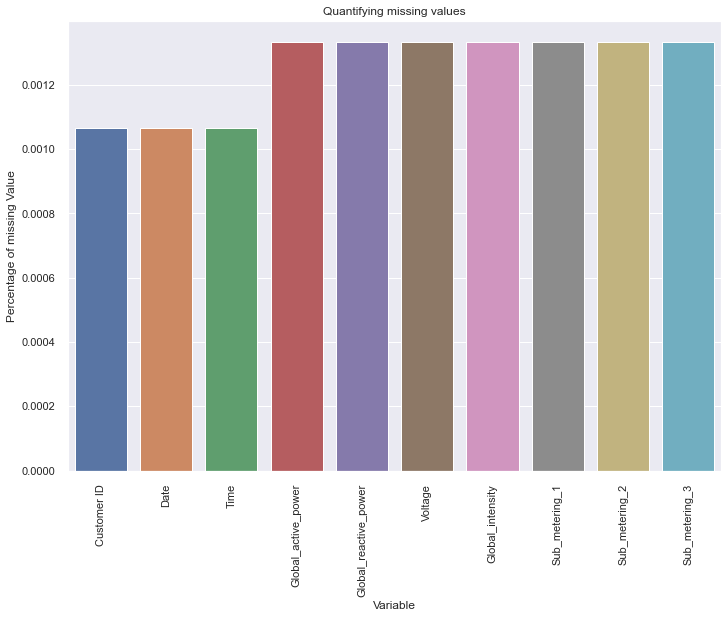

In [11]:
# Visualize the missing values and treatment
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = elect_theft.isna().mean().index, y= elect_theft.isna().mean().values)
plt.xlabel('Variable')
plt.ylabel('Percentage of missing Value')
plt.title('Quantifying missing values')
plt.xticks(rotation=90);

#### Drop Missing Values
From the percentages of missing, it is obvious that missing values are insignificant especially when compare with our available data. We shall drop the missing values and move on with analysis.

In [12]:
#drop missing values

elect_theft.dropna(inplace=True)

In [13]:
# see current shape
elect_theft.shape

(500312, 10)

In [14]:
# free of missing values?..
if elect_theft.isna().sum().any() == 0:
    print('There are no missing values')

There are no missing values


In [15]:
#combine date and time col together for easy handling
elect_theft['Date'] = elect_theft['Date'] + ' ' + elect_theft['Time']

In [16]:
# convert to datetime type
elect_theft['Date'] = pd.to_datetime(elect_theft['Date'])

In [17]:
pd.set_option('display.max_rows', 2000)

In [18]:
# convert values to their proper data times
elect_theft[['Global_active_power','Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = elect_theft[['Global_active_power','Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']].apply(pd.to_numeric)

In [19]:
elect_theft.dtypes

Customer ID                     float64
Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                    int64
Sub_metering_2                    int64
Sub_metering_3                  float64
dtype: object

In [20]:
# Time variable nolonger useful hence should be dropped
elect_theft_trim = elect_theft.drop('Time', axis=1)

In [21]:
# clean columns
def clean_col(col):
    return col.lower().replace(' ', '_')
elect_theft_trim.rename(columns=clean_col, inplace=True)


In [22]:
# covert to proper type
elect_theft_trim['sub_metering_3'] = elect_theft_trim['sub_metering_3'].astype(np.int)
elect_theft_trim['customer_id'] = elect_theft_trim['customer_id'].astype(np.int)

## Feature Engineering

In [23]:
#elect_theft_setindex = elect_theft_trim.set_index('date')
elect_theft_trim['hours'] = elect_theft_trim['date'].dt.hour
elect_theft_trim['month'] = elect_theft_trim['date'].dt.month


In [24]:
elect_theft_trim.columns

Index(['customer_id', 'date', 'global_active_power', 'global_reactive_power',
       'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3', 'hours', 'month'],
      dtype='object')

### Sub-metering System

#### Aggregates of Submetering values
Sub-metering, in essence, is a system where a landlord or property manager as a way of ensuring individual tenant pay for the amount of power they use, installs sub-meter in each tenant's apartment. Conventionally sub-metering is measured in units of kWh. A Submeter connected to the master meter. We can know the total power utilised by a tenant under the sub-metering system.

However, the spikes from the various sub-meter counts reveal a significant frequency of zero counts/unit. Does this mean that even when the associated global active power record positive values indicating usage, submeter of the tenant doesn't recognise these? We can also observe that there is an average usage from the sub-meter readings of 1.118996, 1.274501,6.006970 for sub-meter1, sub-meter2 and sub-meter3 of tenants respectively.


In [25]:
# get value of total sub-metering
elect_theft_trim['total_sub_metering'] = elect_theft_trim['sub_metering_1'] + elect_theft_trim['sub_metering_2'] + elect_theft_trim['sub_metering_3']

<AxesSubplot:>

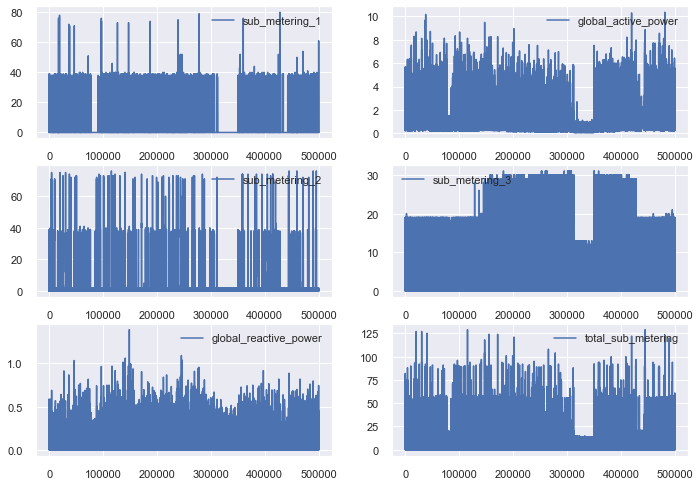

In [26]:
#Distribution of kW and Kw.h of power consumption
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
elect_theft_trim.plot(y='global_active_power', kind='line', ax = ax2)
elect_theft_trim.plot(y='sub_metering_1', kind='line', ax = ax1)
elect_theft_trim.plot(y='sub_metering_2', kind='line', ax = ax3)
elect_theft_trim.plot(y='sub_metering_3', kind='line', ax = ax4)
elect_theft_trim.plot(y='total_sub_metering', kind='line', ax = ax6)
elect_theft_trim.plot(y='global_reactive_power', kind='line', ax = ax5)


<AxesSubplot:xlabel='sub_metering_1', ylabel='Density'>

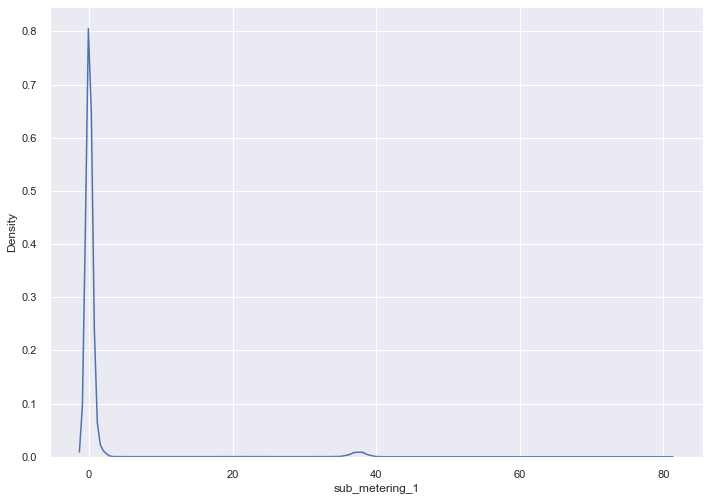

In [27]:
sns.kdeplot(elect_theft_trim['sub_metering_1'])


<AxesSubplot:xlabel='sub_metering_2', ylabel='Density'>

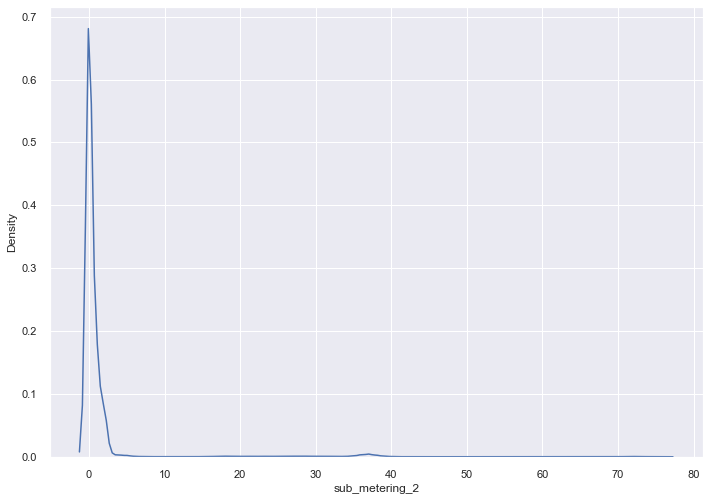

In [28]:
sns.kdeplot(elect_theft_trim['sub_metering_2'])


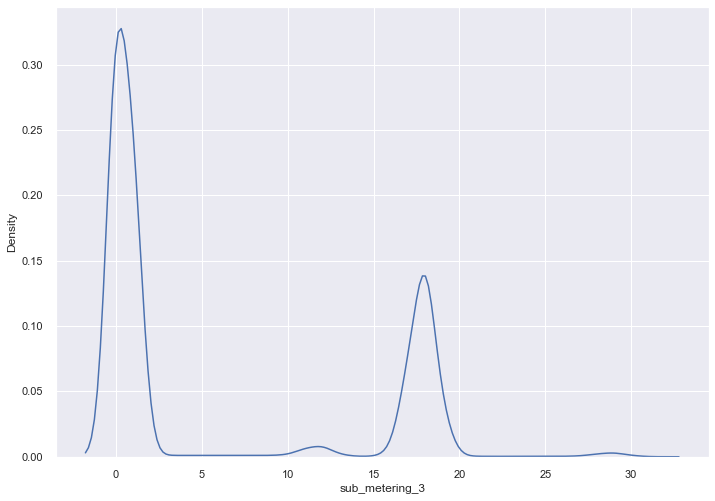

In [29]:
sns.kdeplot(elect_theft_trim['sub_metering_3']);

### The Total  Power

#### Can we derive the apparent power from our dataset?
Power as a concept from the perspective of electricity comes in three parameters:
- Apparent Power
- Active Power
- Reactive Power

**Apparent Power**
Apparent power is the amount of power being supplied or delivered. Its unit of measurement is `KVA`. It is the total amount of power in use in a system. Its scientific letter is `S`, and it is commonly a phase I and phase III. In an ideal power system `KW == KVA`. That is the active power should be equal to the apparent power. 

**Active Power**
It is also called *actual power*, or *working power*, or *Useful power* or *Real Power* It is the amount of power converted into useful output, in other words, it is the amount of power used by utility customer's loads. Thus it is that power that makes our heater hot or powers our coffee marker. Its scientific letter is `P`, and its unit of measurement is `kW` Kilowatt.

**Reactive Power**
It is also known as *useless power* or *watt-less power*. It is that form of power that continuously bounce back and forth between the source and load. In other words, it reacts to the apparent and real power upon the use of the customer's loads. It gives the magnetising, inductive and capacitive effect to the power supplied or delivered.

In Electrical Engineering parlance the above three levels are together called the **Triangle of Power** because by applying the Pythagoras theorem apparent power is derived from both active and reactive power. The apparent power is the square root of the sum of the root of reactive power and active power.

No doubt knowing the apparent power from our dataset would enrich our understanding of the power system.

In [30]:
elect_theft_trim['apparent_power'] = np.sqrt(elect_theft_trim['global_active_power']**2 + elect_theft_trim['global_reactive_power']**2)

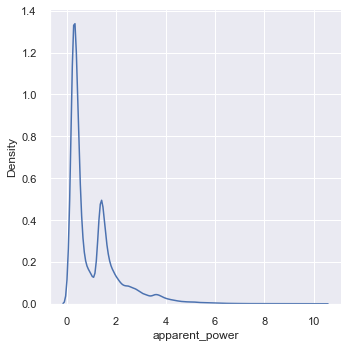

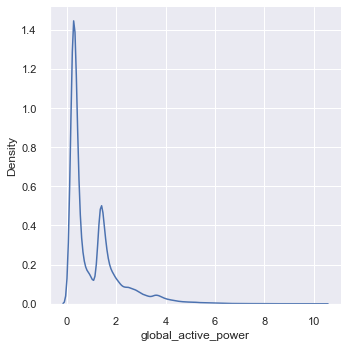

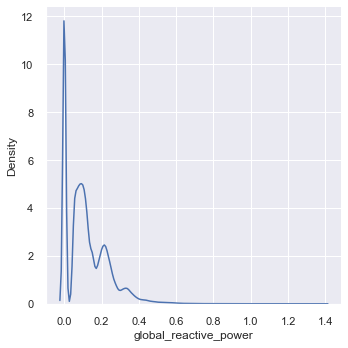

In [31]:
sns.displot(elect_theft_trim['apparent_power'],kind='kde') 
sns.displot(elect_theft_trim['global_active_power'], kind='kde') 
sns.displot(elect_theft_trim['global_reactive_power'], kind='kde')

#### Power Efficiency in the System

##### How efficient is the power system?
Power Factor measures the level of efficiency of power systems. Traditionally its value is usually between 0 and 1. The closer a `PF` value is to 1, the more efficient the power system.

From the above demonstration, we can observe that while it's true that there is little or no perfect power system that is, there is some level of reactive power in every apparent power, we can improve power efficiency to a level that active power constitutes 60 to 100 per cent of the overall apparent power. From our data, we can see that there is a significant level of power efficiency so much so that for the period under consideration, the system experience 24 per cent perfect power efficiency level. It is essential to note also that where there is an increased level of efficiency or power factor, the more work we can do, and the electricity utility customer tends to spend less in the medium to longterm period.



In [32]:
elect_theft_trim['power_factor'] = elect_theft_trim['global_active_power'] / elect_theft_trim['apparent_power']

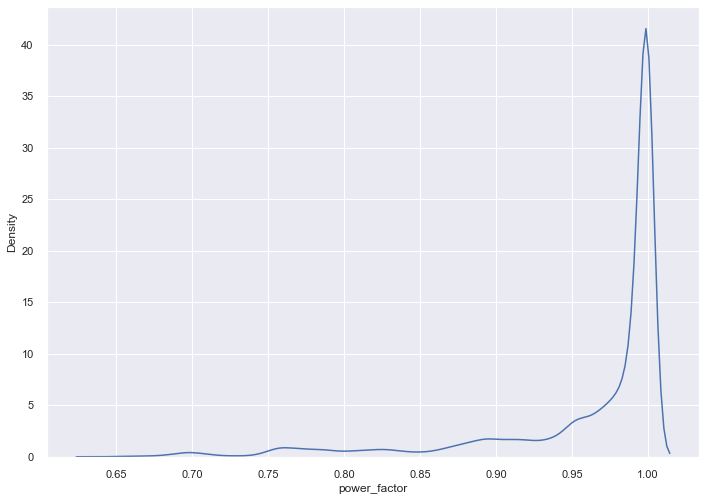

In [33]:
sns.kdeplot(x=elect_theft_trim['power_factor']);

In [34]:
# minimum/ maximum  level of power efficiency
elect_theft_trim['power_factor'].min(), elect_theft_trim['power_factor'].max()

(0.6382205687997312, 1.0)

### Basic Statistics
Without any doubt, the below basic statistics carries alot of information. For instance we can see that the global active power, our target variable has an average of 1.063232 kva which in otherwords is the common usage thus any usage over and above the 75% percentile would appear as outlier hence suspicious usage. And from the maximum usage we can get an idea of the extreme usage which definitely demand further investigation!

We can also observed a significant level of power efficiency as the average power factor is 0.96. The PF value to a large extent explains the significant similarity between the average global active power and average apprant power. Also we can see that the average hour is 11+ hours for the period under review

In [35]:
elect_theft_trim.describe().T

count          mean          std           min  \
customer_id            500312.0  19992.838966  5772.276138  10001.000000   
global_active_power    500312.0      1.063232     1.066026      0.076000   
global_reactive_power  500312.0      0.118694     0.110247      0.000000   
voltage                500312.0    240.493645     2.813120    224.580000   
global_intensity       500312.0      4.520554     4.492096      0.200000   
sub_metering_1         500312.0      1.118996     6.165432      0.000000   
sub_metering_2         500312.0      1.274501     5.812022      0.000000   
sub_metering_3         500312.0      6.006970     8.204691      0.000000   
hours                  500312.0     11.505017     6.920403      0.000000   
month                  500312.0      6.232947     3.296209      1.000000   
total_sub_metering     500312.0      8.400466    12.756581      0.000000   
apparent_power         500312.0      1.081098     1.060350      0.076000   
power_factor           500312.0      0.961000     0.066327      0.638221   

                                25%           50%           75%           max  
customer_id            14996.000000  19987.000000  25001.000000  30000.000000  
global_active_power        0.298000      0.552000      1.508000     10.348000  
global_reactive_power      0.046000      0.096000      0.186000      1.390000  
voltage                  238.780000    240.540000    242.350000    250.920000  
global_intensity           1.400000      2.400000      6.200000     44.600000  
sub_metering_1             0.000000      0.000000      0.000000     80.000000  
sub_metering_2             0.000000      0.000000      1.000000     76.000000  
sub_metering_3             0.000000      1.000000     17.000000     31.000000  
hours                      6.000000     12.000000     18.000000     23.000000  
month                      3.000000      6.000000      9.000000     12.000000  
total_sub_metering         0.000000      1.000000     18.000000    129.000000  
apparent_power             0.322224      0.583346      1.516915     10.348341  
power_factor               0.954253      0.993795      0.999887      1.000000

### Correlations and Heatmap

In [36]:
heatmap_viz = elect_theft_trim.drop(['date'],axis=1)
heatmap_viz = heatmap_viz.set_index('customer_id')


### Variables and their relationships/Correlations
- From the heat map  we can see that there is a strong positive relationship between Global intensity and Global active power 

- Also we observed a somewhat weak negative relationship between Global active power and Voltage, and Global intensity and Voltage
- Also we can see a strong positive correlation between Global active power and Apparent power variables. This actually makes sense because as the global active power increase so will the apparent power as the global active power is one of its constituents.
- We can also see that the month variable has very weak negative correlation with other variable especially global active power which is just `-0.014`

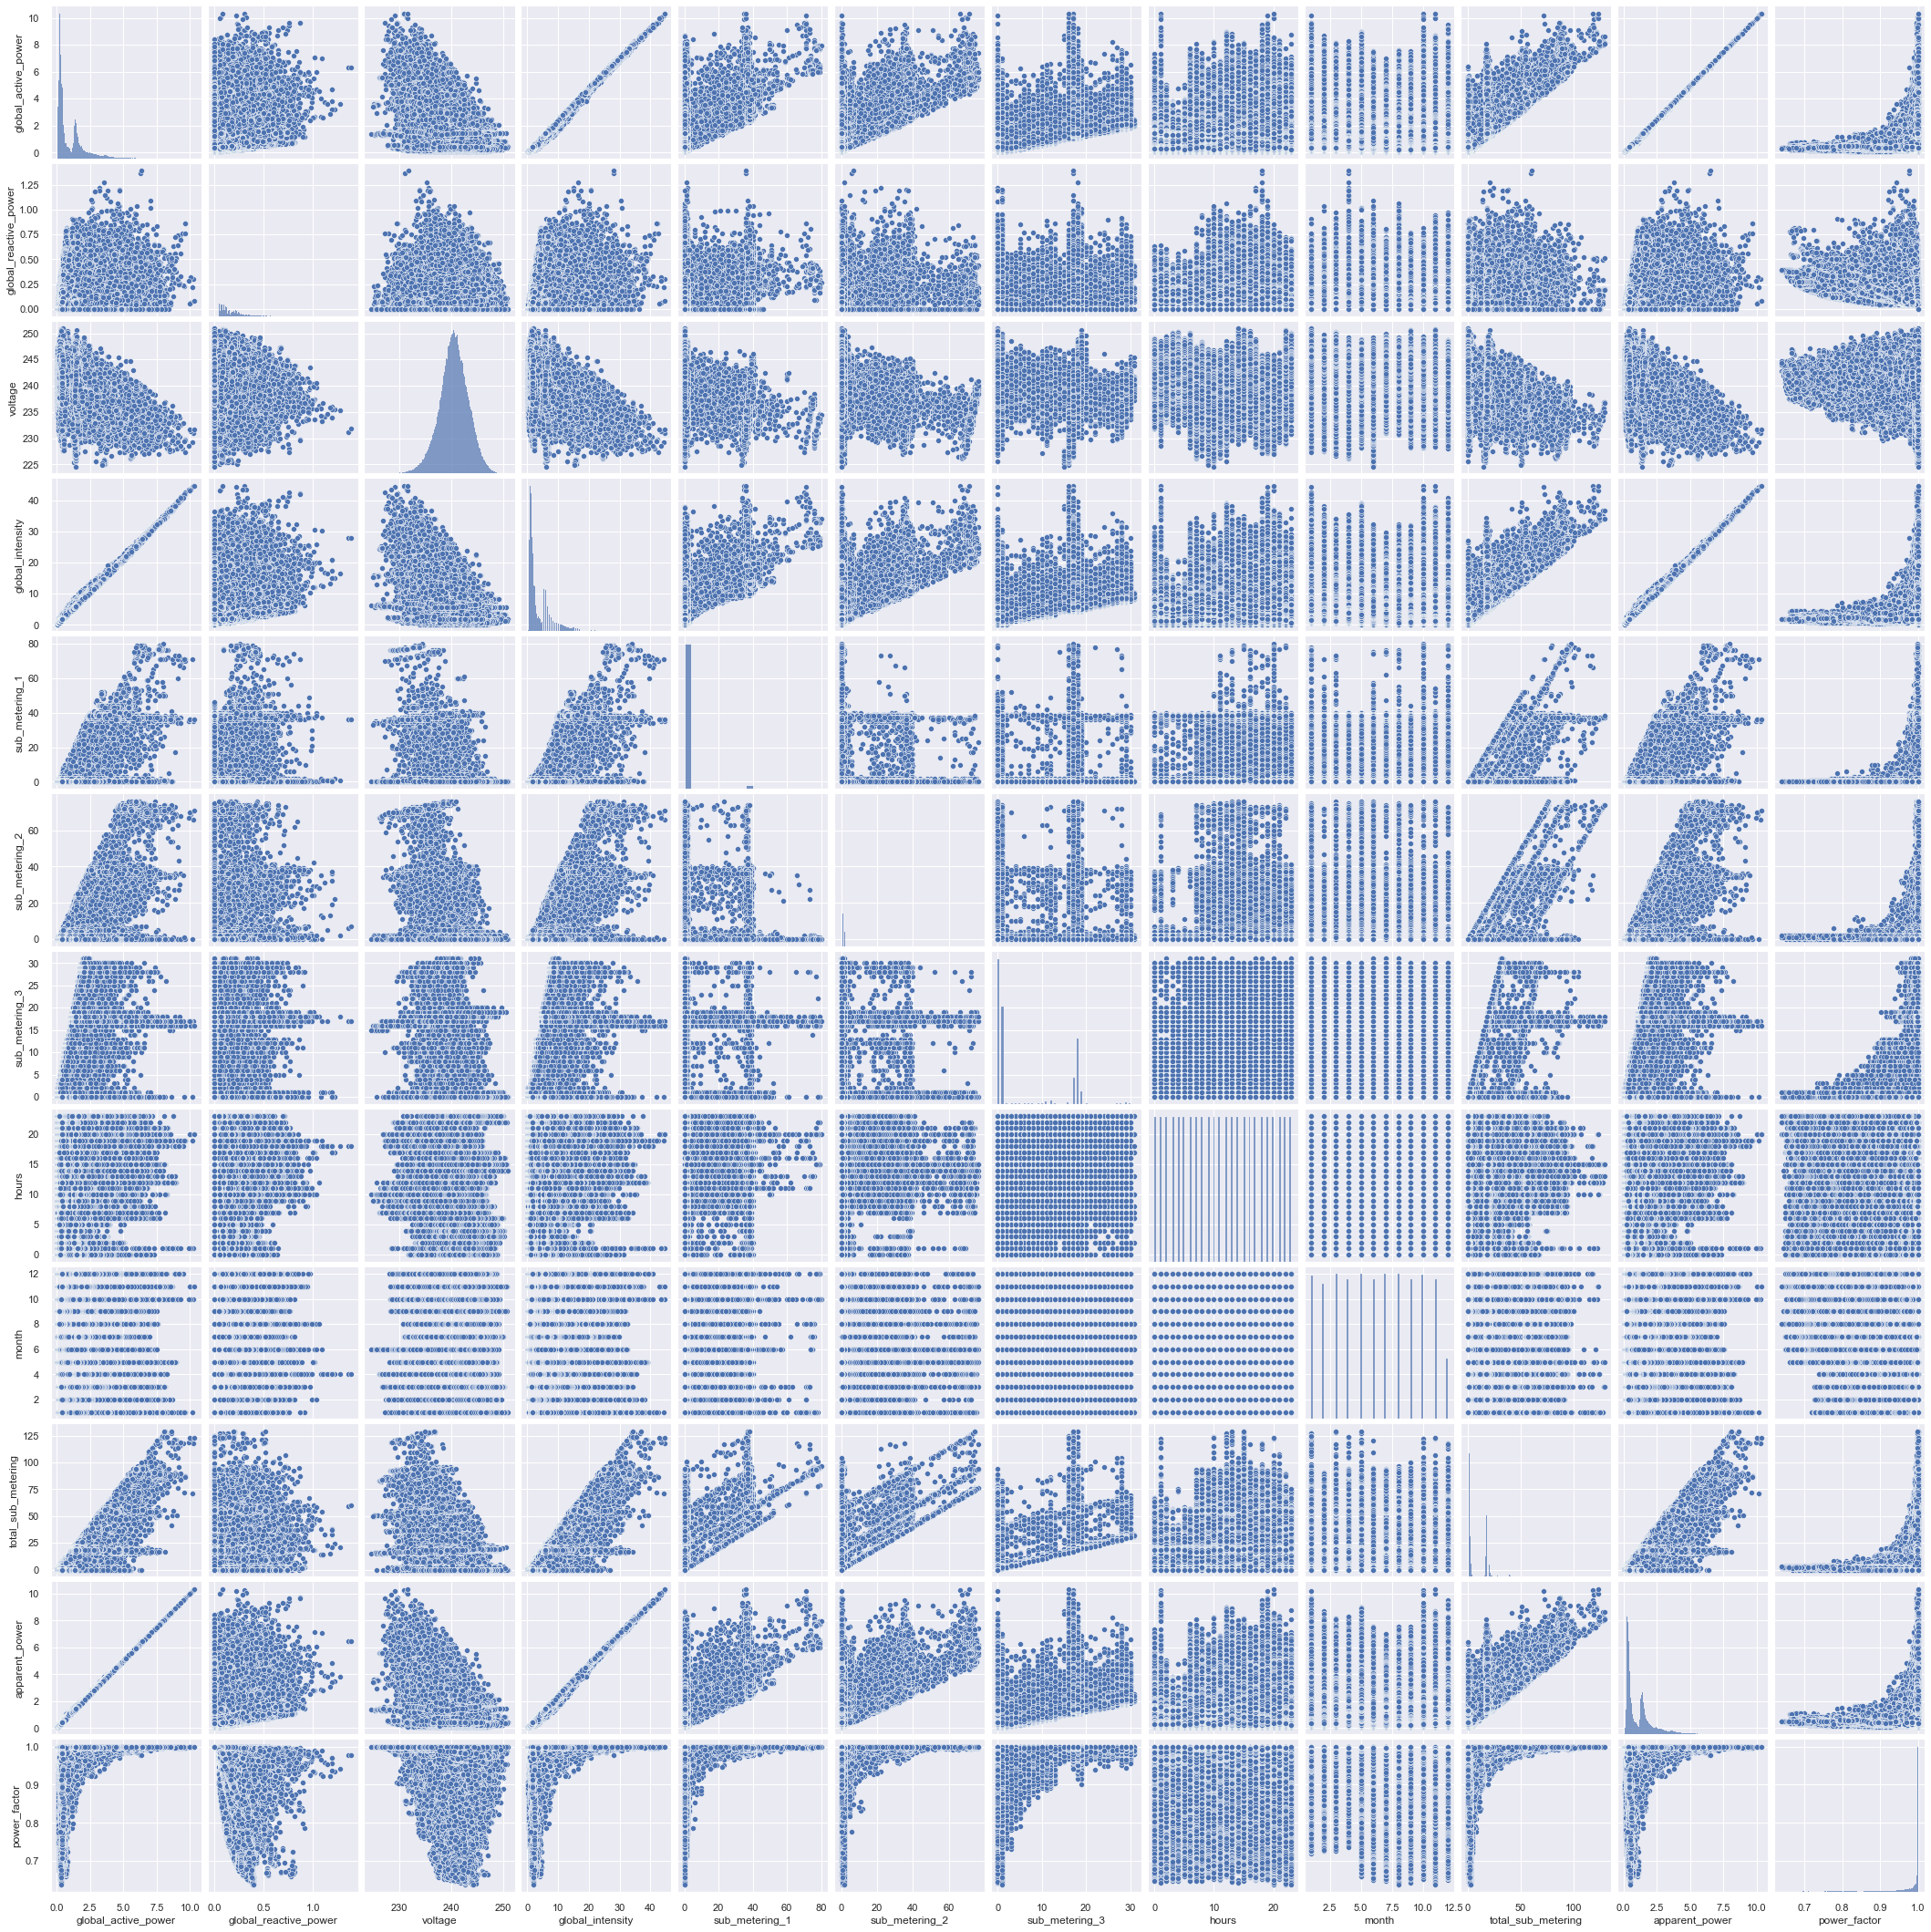

In [37]:
sns.pairplot(heatmap_viz)

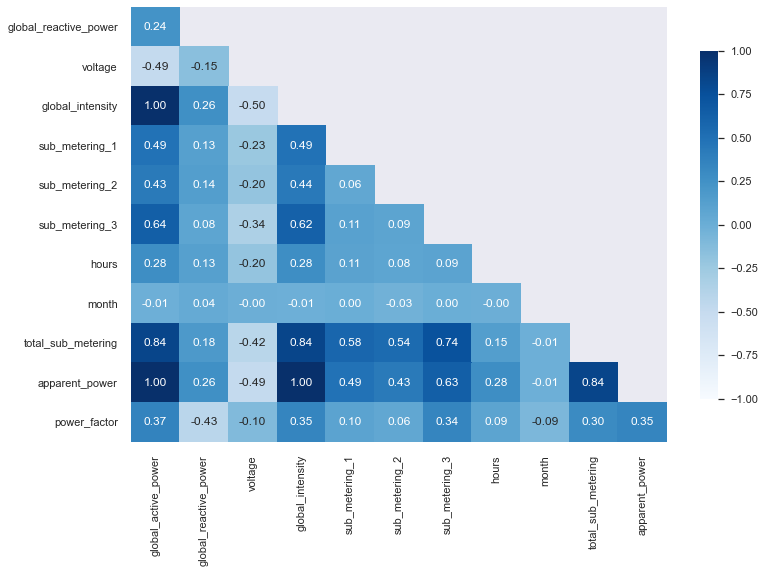

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
experi = heatmap_viz.corr()
#mask
mask =np.triu(np.ones_like(experi,dtype=np.bool))
#adjust mask and dataframe
mask = mask[1:,:-1]
corr = experi.iloc[1:,:-1].copy()
#plot heat map
sns.heatmap(corr,mask=mask, annot=True,fmt='.2f',cmap='Blues',vmin=-1,vmax=1,cbar_kws={'shrink':.8})
#yticks
plt.yticks(rotation=0)

plt.show()

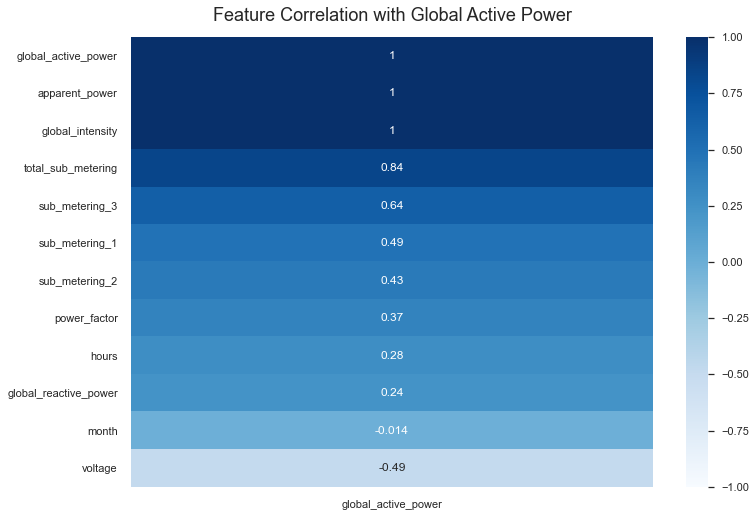

In [39]:
#Correlation of Independent variables with Dependent variable
corr_ind_dep = heatmap_viz.reset_index().drop(['customer_id'],axis=1)

heatmap = sns.heatmap(corr_ind_dep.corr()[['global_active_power']].sort_values(by='global_active_power', ascending=False),vmin=-1,vmax=1,annot=True,cmap='Blues')
heatmap.set_title('Feature Correlation with Global Active Power',fontdict={'fontsize':18},pad=16);


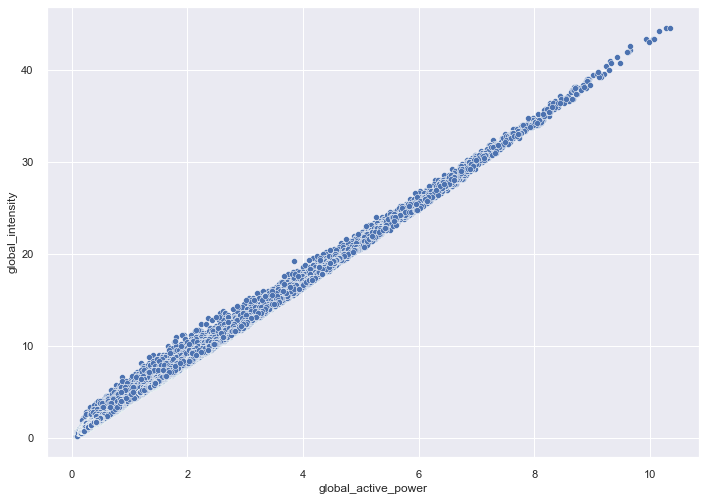

In [40]:
sns.scatterplot(x='global_active_power',y='global_intensity', data=elect_theft_trim);

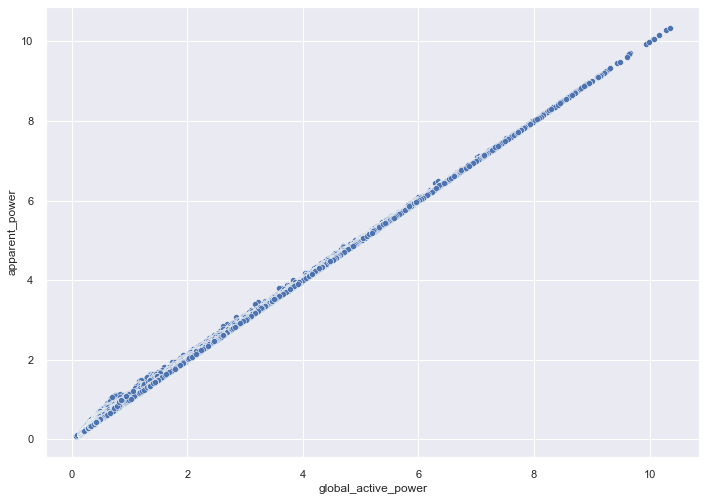

In [41]:
sns.scatterplot(x='global_active_power',y='apparent_power', data=elect_theft_trim);

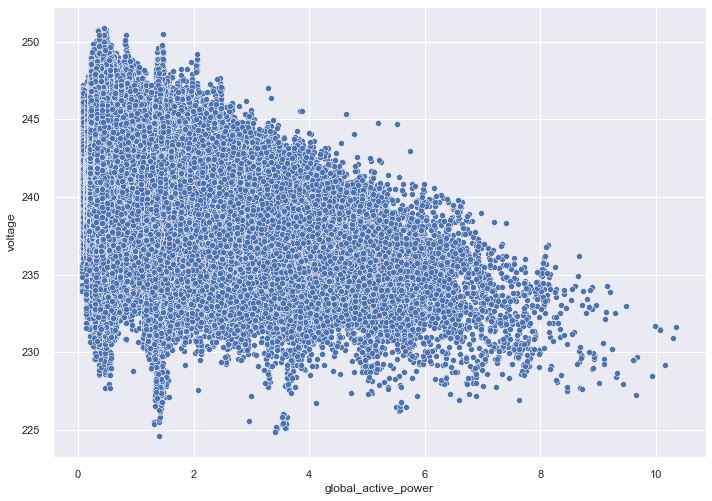

In [42]:
sns.scatterplot(x='global_active_power',y='voltage', data=elect_theft_trim);

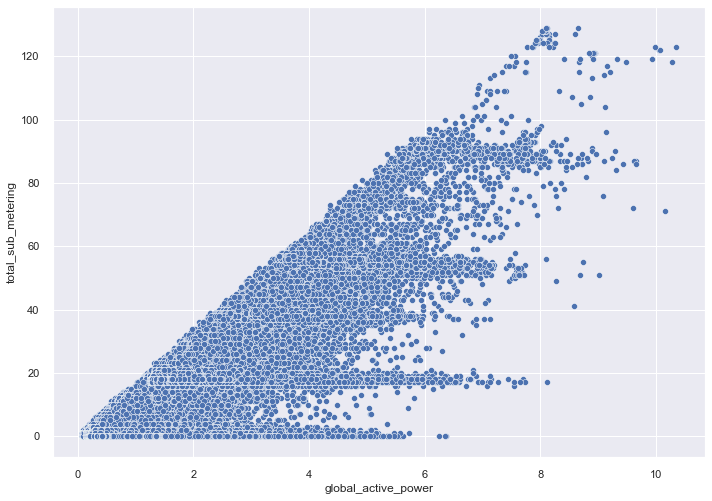

In [43]:
sns.scatterplot(x='global_active_power',y='total_sub_metering', data=elect_theft_trim);

## Depicting Outliers
With our below `find_boundaries` function, we can detect the upper bound and lower bound of outliers of any variable. Our primary concern is to understand unusual levels of reactive power, i.e. suspicious usage.
We can reveal mild outlier within 1.5 to 2 standard deviation and **extreme** outliers with a standard deviation of 3 and above.

We can display the first five top mild outliers and top five extreme outliers.



In [44]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_booundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_booundary, lower_boundary

In [45]:
upper_boundary3, lower_boundary3 = find_boundaries(elect_theft_trim,'global_active_power', 3)

In [46]:
upper_boundary1, lower_boundary1 = find_boundaries(elect_theft_trim,'global_active_power', 1.5)

In [47]:
outlier1 = np.where(elect_theft_trim['global_active_power'] > upper_boundary1, True,
                   np.where(elect_theft_trim['global_active_power'] < lower_boundary1, True, False))

In [48]:
outlier3 = np.where(elect_theft_trim['global_active_power'] > upper_boundary3, True,
                   np.where(elect_theft_trim['global_active_power'] < lower_boundary3, True, False))

In [49]:
outlier_df1 = elect_theft_trim.loc[outlier1,'global_active_power']
outlier_df3 = elect_theft_trim.loc[outlier3,'global_active_power']

In [50]:
# five top outliers of Global active power with a distance of 1
outlier_df1.head()

66     3.902
147    4.034
148    4.402
149    4.396
150    4.450
Name: global_active_power, dtype: float64

In [51]:
# five top outlier of Global active power with a distnace of 3. This represent the extreme outliers values
outlier_df3.head()

165     5.686
548     5.506
549     5.540
550     5.342
1308    5.600
Name: global_active_power, dtype: float64

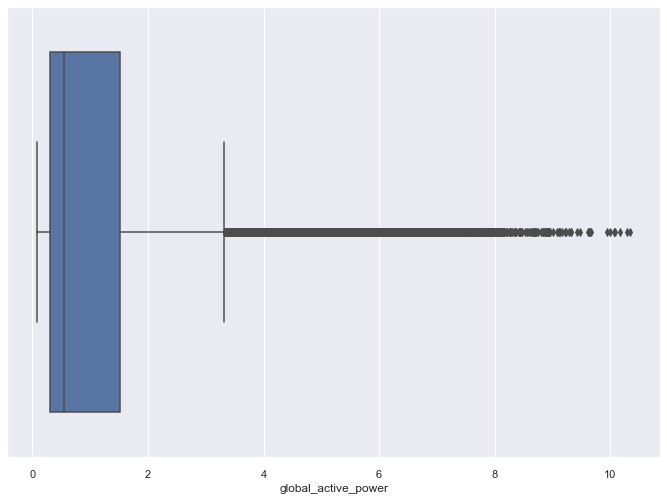

In [52]:
# this visualization depicts the outlier from the top whisker
ax = sns.boxplot(x='global_active_power', data=elect_theft_trim)

### Get  Standardized and PCA Versions of Data 

In [53]:
pre_std_data = elect_theft_trim.drop(['customer_id','date'],axis=1)

In [54]:
y_orig = pre_std_data['global_active_power']

In [55]:
pre_std_data = pre_std_data.drop(['global_active_power'], axis=1)

In [56]:
pre_std_data.head()

global_reactive_power  voltage  global_intensity  sub_metering_1  \
0                  0.108   242.55               5.6               0   
1                  0.110   242.87               5.6               0   
2                  0.000   243.00               5.4               0   
3                  0.000   242.79               5.2               0   
4                  0.000   243.35               5.2               0   

   sub_metering_2  sub_metering_3  hours  month  total_sub_metering  \
0               0               0      8      1                   0   
1               0               0      8      1                   0   
2               0               0      8      1                   0   
3               0               0      8      1                   0   
4               0               0      8      1                   0   

   apparent_power  power_factor  
0        1.388207      0.996969  
1        1.396340      0.996892  
2        1.328000      1.000000  
3        1.298000      1.000000  
4        1.302000      1.000000

In [57]:
scaled_x_data = pd.DataFrame(StandardScaler().fit_transform(pre_std_data), columns=pre_std_data.columns)
pca = PCA(n_components=11)
pca_scaled_data =  pd.DataFrame(pca.fit_transform(scaled_x_data), columns=pre_std_data.columns)

print(f'The sclaed portion  of the data has {scaled_x_data.shape[0]} rows and {scaled_x_data.shape[1]} columns')
print('=' * 35)
print(f'The pca portion  of the data has {pca_scaled_data.shape[0]} rows and {pca_scaled_data.shape[1]} columns')

The sclaed portion  of the data has 500312 rows and 11 columns
The pca portion  of the data has 500312 rows and 11 columns


In [58]:
# SCALED version are truly between 0 and 1
scaled_x_data.describe().T

count          mean       std       min       25%  \
global_reactive_power  500312.0 -2.338216e-16  1.000001 -1.076619 -0.659373   
voltage                500312.0  1.970089e-14  1.000001 -5.656944 -0.609162   
global_intensity       500312.0  2.408658e-16  1.000001 -0.961813 -0.694677   
sub_metering_1         500312.0  4.022004e-17  1.000001 -0.181495 -0.181495   
sub_metering_2         500312.0  2.823356e-17  1.000001 -0.219287 -0.219287   
sub_metering_3         500312.0 -2.360371e-17  1.000001 -0.732139 -0.732139   
hours                  500312.0 -7.862223e-17  1.000001 -1.662480 -0.795477   
month                  500312.0 -6.907849e-17  1.000001 -1.587567 -0.980809   
total_sub_metering     500312.0 -8.018445e-17  1.000001 -0.658521 -0.658521   
apparent_power         500312.0  1.477007e-16  1.000001 -0.947894 -0.715684   
power_factor           500312.0 -4.288434e-15  1.000001 -4.866489 -0.101713   

                            50%       75%        max  
global_reactive_power -0.205844  0.610507  11.531477  
voltage                0.016478  0.659893   3.706335  
global_intensity      -0.472064  0.373867   8.922223  
sub_metering_1        -0.181495 -0.181495  12.794089  
sub_metering_2        -0.219287 -0.047230  12.857069  
sub_metering_3        -0.610258  1.339848   3.046191  
hours                  0.071525  0.938528   1.661030  
month                 -0.070671  0.839466   1.749604  
total_sub_metering    -0.580130  0.752517   9.453917  
apparent_power        -0.469424  0.411013   8.739803  
power_factor           0.494452  0.586300   0.588003

### PCA Variance Report

In [59]:
#check explained variance
pca.explained_variance_

array([4.36322404e+00, 1.49818677e+00, 1.01096261e+00, 9.87361041e-01,
       9.22810704e-01, 8.54694729e-01, 6.99549291e-01, 4.17193988e-01,
       2.45402613e-01, 6.36200312e-04, 4.04812943e-26])

In [60]:
#check explained variance ratio
pca.explained_variance_ratio_

array([3.96655938e-01, 1.36198525e-01, 9.19055080e-02, 8.97599152e-02,
       8.38917145e-02, 7.76993655e-02, 6.35952630e-02, 3.79266503e-02,
       2.23092839e-02, 5.78362764e-05, 3.68011031e-27])

In [61]:
pd.set_option('display.max_row',50)
#components
data = {'Variance':pca.explained_variance_, 'pct_Variance_ratio':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['Cumsum'] = var_report['pct_Variance_ratio'].cumsum()
print(f'Number of observation {pca.n_samples_}')
var_report

Number of observation 500312


Variance  pct_Variance_ratio      Cumsum
0   4.363224e+00        3.966559e+01   39.665594
1   1.498187e+00        1.361985e+01   53.285446
2   1.010963e+00        9.190551e+00   62.475997
3   9.873610e-01        8.975992e+00   71.451989
4   9.228107e-01        8.389171e+00   79.841160
5   8.546947e-01        7.769937e+00   87.611097
6   6.995493e-01        6.359526e+00   93.970623
7   4.171940e-01        3.792665e+00   97.763288
8   2.454026e-01        2.230928e+00   99.994216
9   6.362003e-04        5.783628e-03  100.000000
10  4.048129e-26        3.680110e-25  100.000000

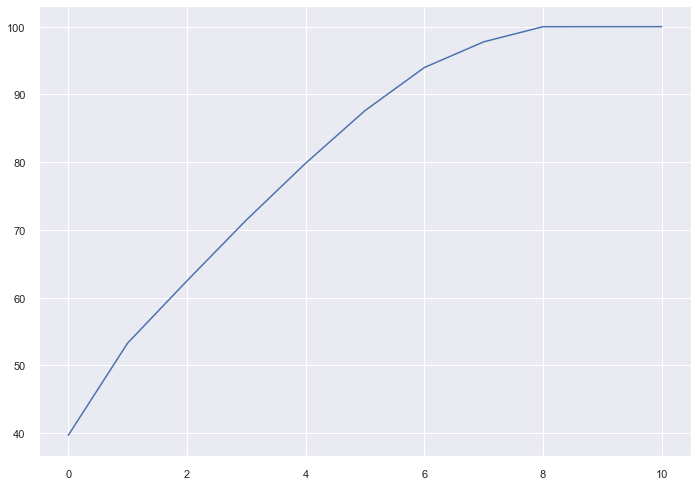

In [62]:
#scree plot
plt.plot(var_report['Cumsum']);

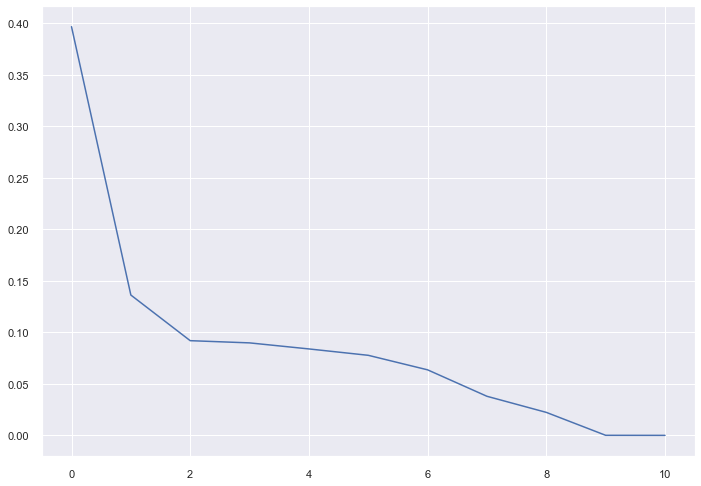

In [63]:
#scree plot
plt.plot(pca.explained_variance_ratio_);

### The Ideal Number of component
From the above scree plot and variance report, the 8th column with a cumulative explained variance ratio of 99.99% appears to be quite impressive because while we reduce our 11 columns to 8 with just a fraction of 0.000.5784 loss of data. Nevertheless, we would start our analysis from 6th downwards, which also poses an impressive respective cumulative explained variance ratio of 93.97% with a data loss of 6.029%. Thus we reduce our variable from 11 to about 6 with just less than 7% loss of data.
As I said, we shall start with 6 columns and depending on the performance of our model may revert to 8 columns which, according to scree plot is the ideal.

In [64]:
# choose first 6 columns
reduce_col6_pca = pca_scaled_data.iloc[:,0:6]
reduce_col8_pca = pca_scaled_data.iloc[:,0:8]

In [65]:
reduce_col6_pca.shape

(500312, 6)

In [66]:
reduce_col8_pca.shape

(500312, 8)

### Relationship with Target and Distributions( Three Versions Of Data)
From the below visualisations in term of distribution, the version of our data transformed via PCA has more narrow normal curve though some are multi-modal. I'm not surprised here as the data is fully standardised. A similar shape under a scaled version of the data; however, apart from the voltage variable which spotted a somewhat perfect normal bell curve, other shapes are more or less right-skewed. Surprising the original data in this line shared a lot of similarities with the scaled version of the data. Also, we can see that the month and hour variable aren't that important after all.

Nevertheless, in terms of the relationship of the variables with the target variable, Global active power, we can see that the original version of the data displays some decent strong positive linear relationship with the target variable.
For the PCA version of the data set, the relationship is so linear, but we see a firmer shape which suggests some level of connection. As the scaled version of the data, it has a similar shape with the PCA version of data but no fundamental relationship with the target per se. 

Without the risk of jumping into hasty conclusions, the variable of our original data to a large extent explained our target variable better; hence I won't be amazed if it performs better with our model.


#### Distribution of Variable(PCA data)

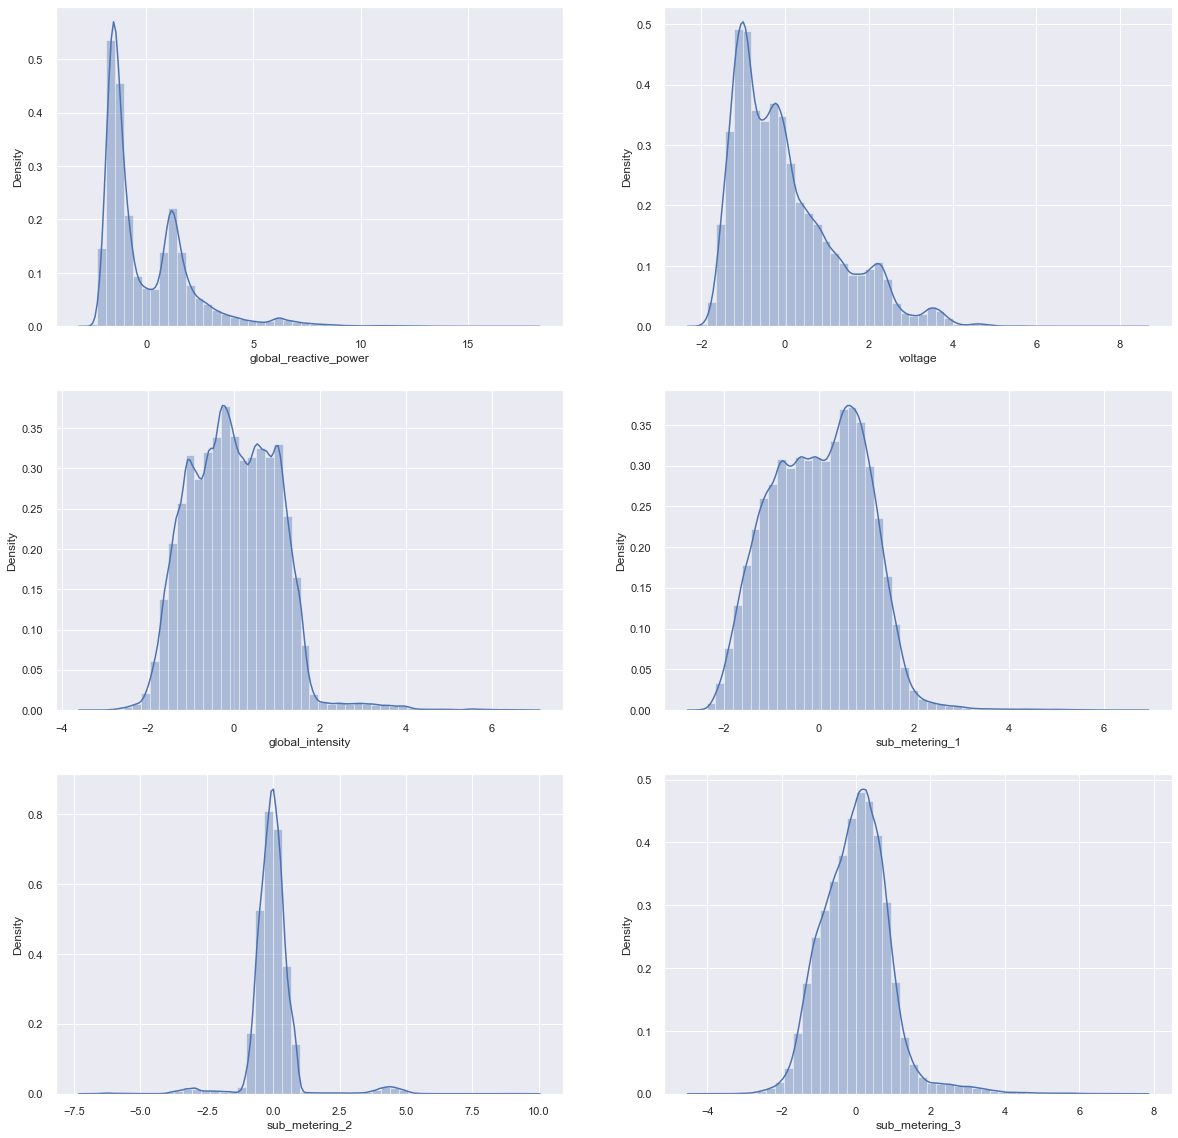

In [67]:
#Distribution of PCA tranformed dataset
fig, axs = plt.subplots(3, 2, figsize=(20,20))
for ix, col in enumerate(reduce_col6_pca.columns):
    p0 = ix // 2
    p1 = ix % 2
    sns.distplot(reduce_col6_pca[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

#### Distribution of Variable (Scaled Data)

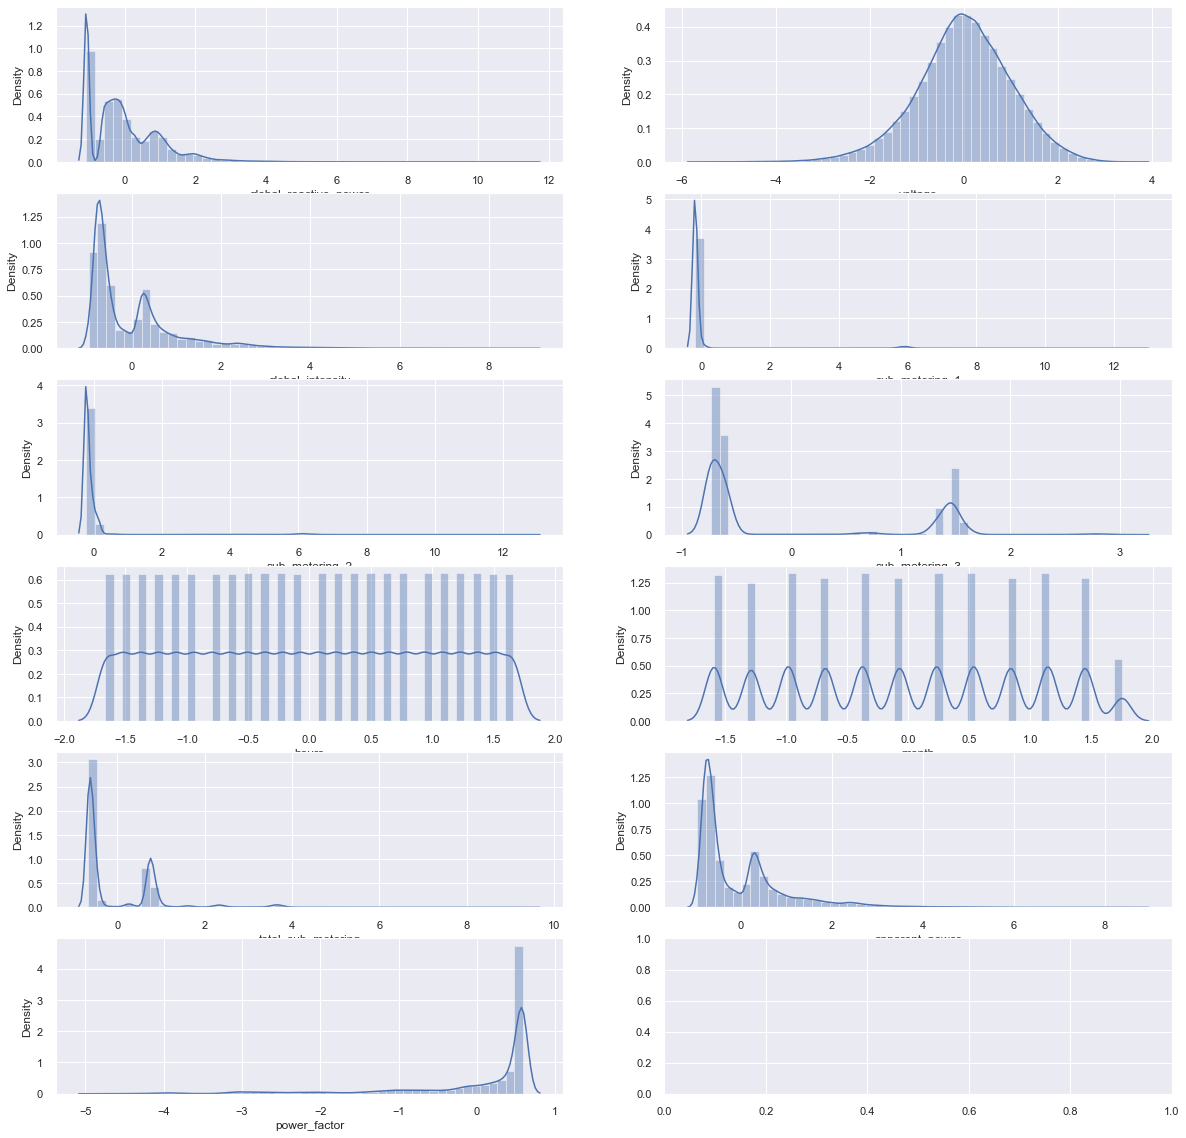

In [68]:
#Distribution of PCA tranformed dataset
fig, axs = plt.subplots(6, 2, figsize=(20,20))
for ix, col in enumerate(scaled_x_data.columns):
    p0 = ix // 2
    p1 = ix % 2
    sns.distplot(scaled_x_data[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

#### Distribution of Variable(Original Data)

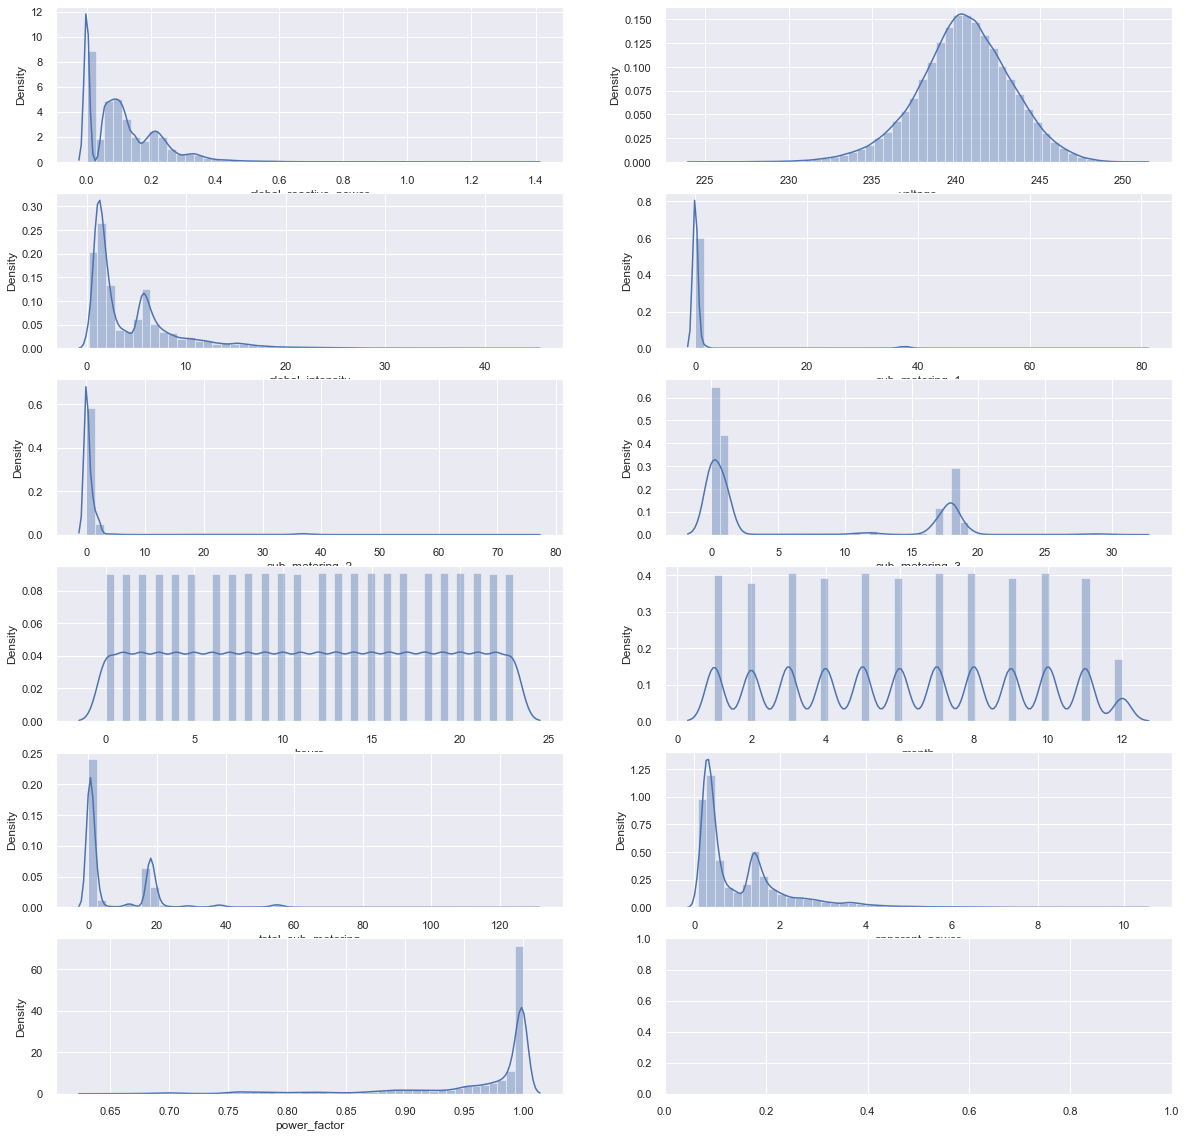

In [69]:
#Distribution of PCA tranformed dataset
fig, axs = plt.subplots(6, 2, figsize=(20,20))
for ix, col in enumerate(pre_std_data.columns):
    p0 = ix // 2
    p1 = ix % 2
    sns.distplot(pre_std_data[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

#### Relationship with Global active power (PCA data)

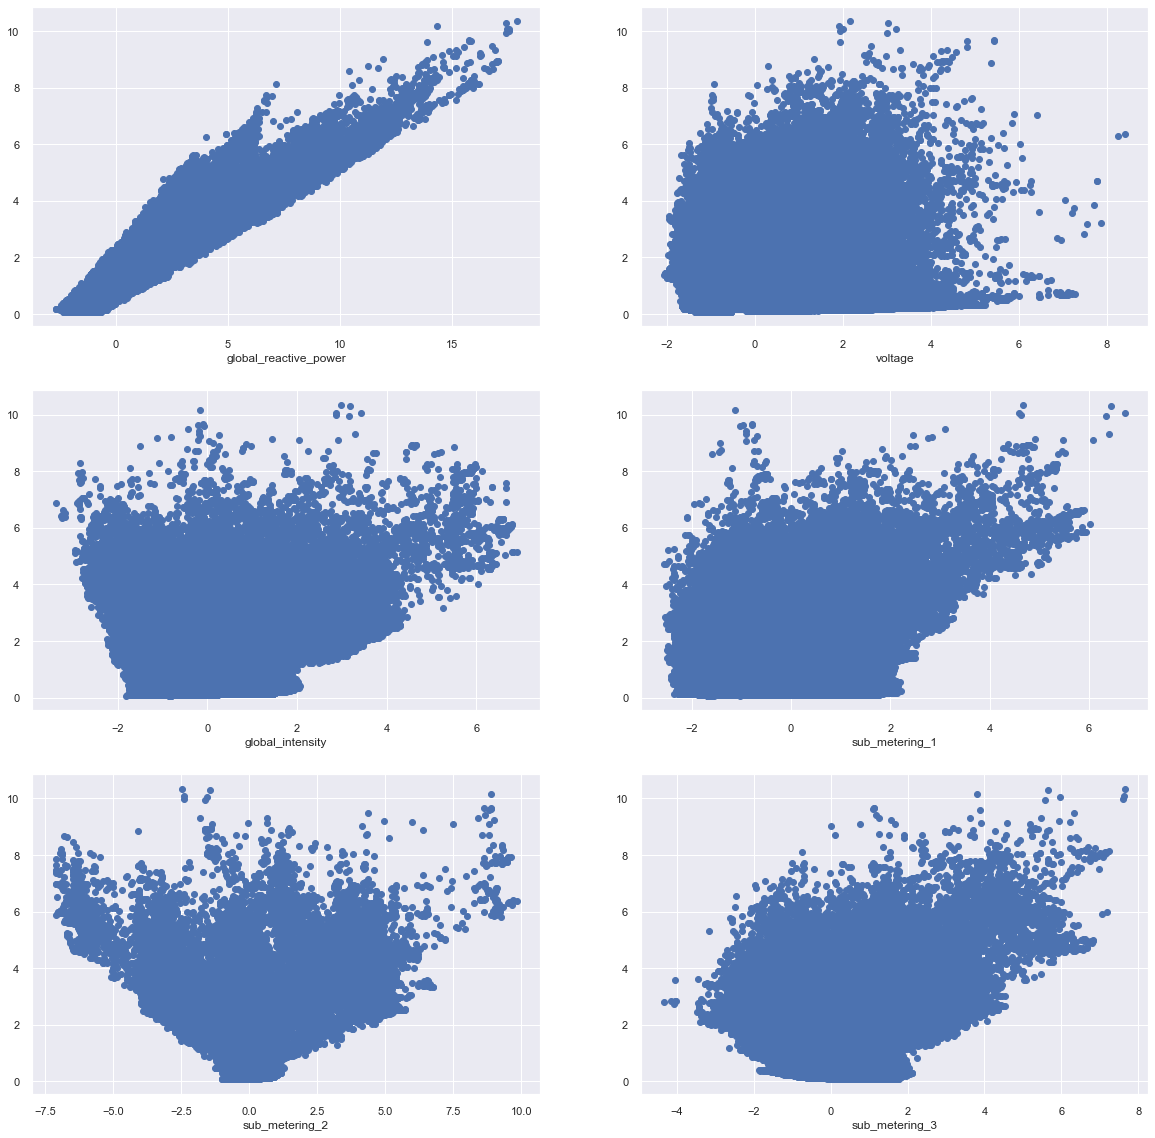

In [70]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
for ix, feature in enumerate(reduce_col6_pca.columns):
    p0 = ix // 2
    p1 = ix % 2
    axs[p0, p1].scatter(reduce_col6_pca[feature], y_orig)
    axs[p0, p1].set(xlabel=feature )

#### Relationship with Global active power (Original Data)

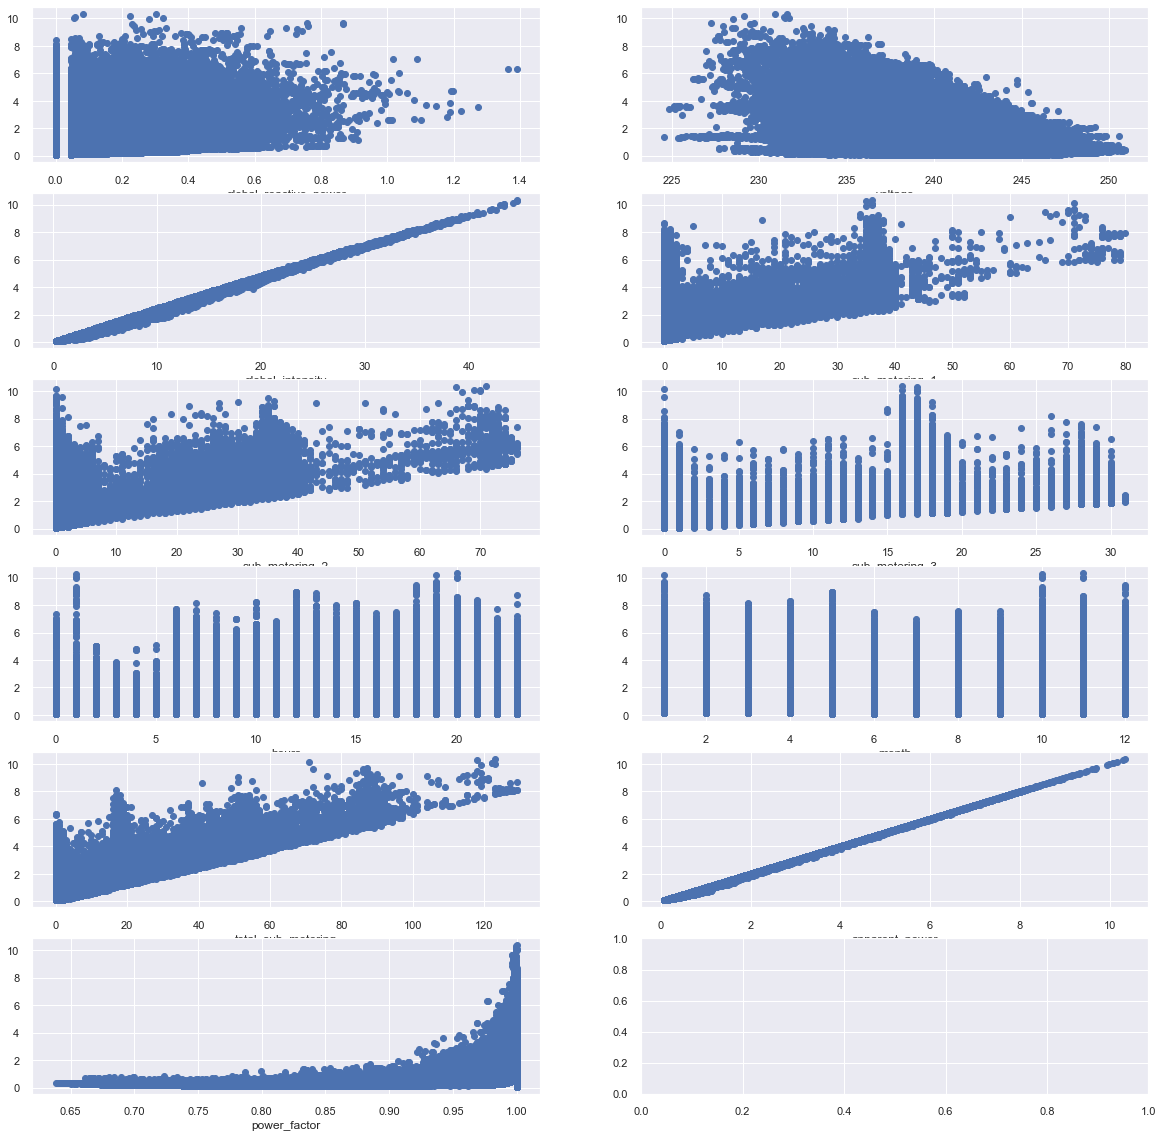

In [71]:
fig, axs = plt.subplots(6, 2, figsize=(20, 20))
for ix, feature in enumerate(pre_std_data.columns):
    p0 = ix // 2
    p1 = ix % 2
    axs[p0, p1].scatter(pre_std_data[feature], y_orig)
    axs[p0, p1].set(xlabel=feature )

#### Relationship with Global active power (scaled Data)

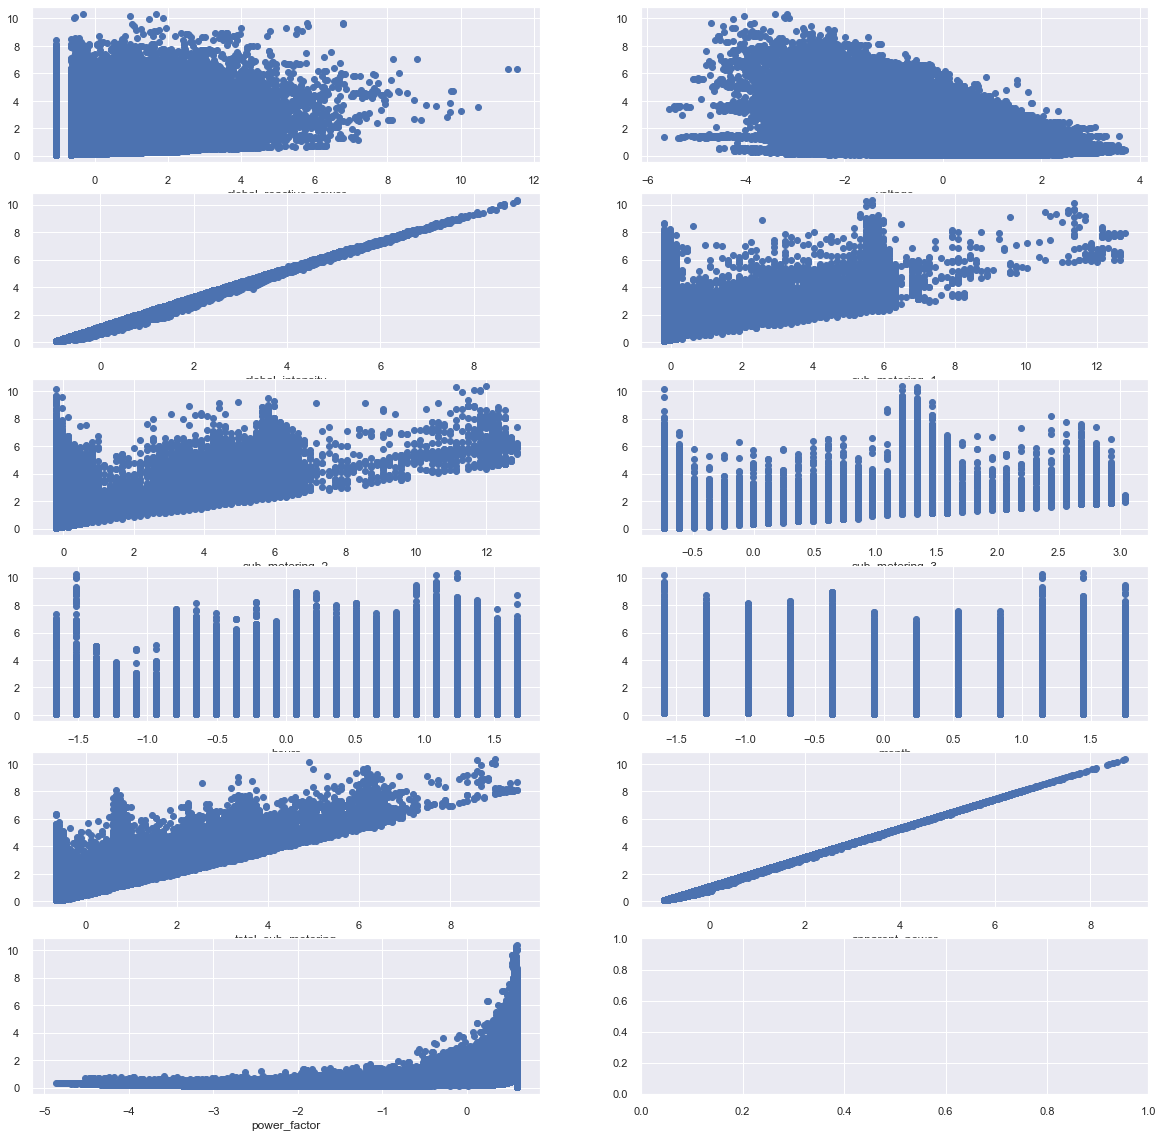

In [72]:
fig, axs = plt.subplots(6, 2, figsize=(20, 20))
for ix, feature in enumerate(scaled_x_data.columns):
    p0 = ix // 2
    p1 = ix % 2
    axs[p0, p1].scatter(scaled_x_data[feature], y_orig)
    axs[p0, p1].set(xlabel=feature )

## Base Model
Our modelling process will be systematic. We shall evaluate our model base on the level of: `R2`,`MSE`,`MAE` and `RMSE`. Firstly, we shall take a cursory look at the performance of our model against the most straightforward regression algorithm: `Linear regression`. We would proceed to apply other algorithms like:
- Ridge regression
- Lasso regression
- Decision Tree Regressor
- Random Forest Regressor
- KNeigbours regressor

We shall then pick base performance the top two algorithms for further fine-tuning with their respective Hyperparameter tuners.
Lastly, we shall apply a couple of 'black box' algorithm on our dataset.

### Simplistic Baseline Model
As a simplistic model to be used as a base performance for the subsequent algorithm, we shall use guessing the mean. Which essentially means guessing the same value for each observation. With the help of numpy repeat function, we populate the mean of global active power.

In [73]:
# Base line guess of the mean of our target variable
meansimple = elect_theft_trim['global_active_power'].mean()
print(meansimple)

#let also show that R_square is equale to zero. We use the numpy repeat function
y_base = elect_theft_trim['global_active_power'].values
y_pred = np.repeat(meansimple, len(elect_theft_trim['global_active_power']))


1.063232267065351


In [74]:
r2_score(y_base,y_pred)

0.0

In [75]:
elect_theft_trim.head()

customer_id                date  global_active_power  \
0        27591 2008-01-01 08:53:00                1.384   
1        28486 2008-01-01 08:54:00                1.392   
2        21999 2008-01-01 08:55:00                1.328   
3        22945 2008-01-01 08:56:00                1.298   
4        18370 2008-01-01 08:57:00                1.302   

   global_reactive_power  voltage  global_intensity  sub_metering_1  \
0                  0.108   242.55               5.6               0   
1                  0.110   242.87               5.6               0   
2                  0.000   243.00               5.4               0   
3                  0.000   242.79               5.2               0   
4                  0.000   243.35               5.2               0   

   sub_metering_2  sub_metering_3  hours  month  total_sub_metering  \
0               0               0      8      1                   0   
1               0               0      8      1                   0   
2               0               0      8      1                   0   
3               0               0      8      1                   0   
4               0               0      8      1                   0   

   apparent_power  power_factor  
0        1.388207      0.996969  
1        1.396340      0.996892  
2        1.328000      1.000000  
3        1.298000      1.000000  
4        1.302000      1.000000

#### Split data -Original Data

In [76]:
productive_power = elect_theft_trim[['global_active_power']]
x_original = elect_theft_trim.drop(['customer_id','date', 'global_active_power'], axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x_original,productive_power, test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape

((400249, 11), (100063, 11))

In [79]:
X_train.columns

Index(['global_reactive_power', 'voltage', 'global_intensity',
       'sub_metering_1', 'sub_metering_2', 'sub_metering_3', 'hours', 'month',
       'total_sub_metering', 'apparent_power', 'power_factor'],
      dtype='object')

In [80]:
#making original data machine learning ready
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values

#### Split Data - Scaled Data

In [81]:
y_orig.shape

(500312,)

In [82]:
scaled_x_data.shape

(500312, 11)

In [83]:
X_train_scaled, X_test_scaled, y_train_scaled,y_test_scaled = train_test_split(scaled_x_data, y_orig, test_size=0.2, random_state=42)

In [84]:
X_train_scaled.shape, X_test_scaled.shape

((400249, 11), (100063, 11))

In [85]:
X_test_scaled = X_test_scaled.values


In [86]:
y_test_scaled = y_test_scaled.values

In [87]:
X_train_scaled = X_train_scaled.values
y_train_scaled = y_train_scaled.values

### Split Data- PCA Data

In [88]:
y_orig.shape, reduce_col6_pca.shape, reduce_col8_pca.shape

((500312,), (500312, 6), (500312, 8))

In [89]:
# pca data reduced to 6 columns
X_train_pca6, X_test_pca6, y_train_pca6, y_test_pca6 = train_test_split(reduce_col6_pca, y_orig, test_size=0.20, random_state=42)

In [90]:
# pca data reduced to 8 columns
X_train_pca8, X_test_pca8, y_train_pca8, y_test_pca8 = train_test_split(reduce_col8_pca, y_orig, test_size=0.20, random_state=42)

In [91]:
X_train_pca6.shape, X_test_pca6.shape, X_train_pca8.shape, X_test_pca8.shape

((400249, 6), (100063, 6), (400249, 8), (100063, 8))

In [92]:
X_train_pca6 = X_train_pca6.values
y_train_pca6 = y_train_pca6.values

X_train_pca8 = X_train_pca8.values
y_train_pca8 = y_train_pca8.values

### Linear Regression on Original Data

Looking at the scores from the cross-validation and as well as the  MSE score on the entire data, there is a significant improvement of our Linear Regression Model when compared to our simplistic mean-guess score above. We use the mean squared error as a measure of performance of the model. MSE is interpreted as the lower, the better. We can also see that there is not much overfitting as the difference between the mean cross-validation score and the score from the prediction on an unseen data set is within a relatively ok threshold.

The feature importance and their impacts on our target variable depicts that the increase of **sub-metering1**,
**sub-metering2** and **sub-metering3**  increases the *global active power* and that *apparent power*, *power factor*, *month* , *hour* , *voltage*, *global intensity* and *global reactive power* do not really matter. However, the total sub_metring lowers the global active power.


In [93]:
model_linear = LinearRegression()
scores_orig = cross_val_score(model_linear,X_train, y_train, cv=4, scoring='neg_mean_squared_error')
print('Mean Squared Error- Linear Regression', scores_orig)

Mean Squared Error- Linear Regression [-6.04606490e-05 -6.15407048e-05 -6.27611849e-05 -6.28017434e-05]


In [94]:
#Linear regression on the whole original data
model_linear.fit(X_train,y_train)

LinearRegression()

In [95]:
#predict value
pred_linear_orig = model_linear.predict(X_test)

In [96]:
y_test = y_test.values

In [97]:
#check the mean square erro - remember the lower the better
mean_squared_error(y_test,pred_linear_orig)

5.99960326737097e-05

In [98]:
r2_score(y_test,pred_linear_orig)

0.9999476060205336

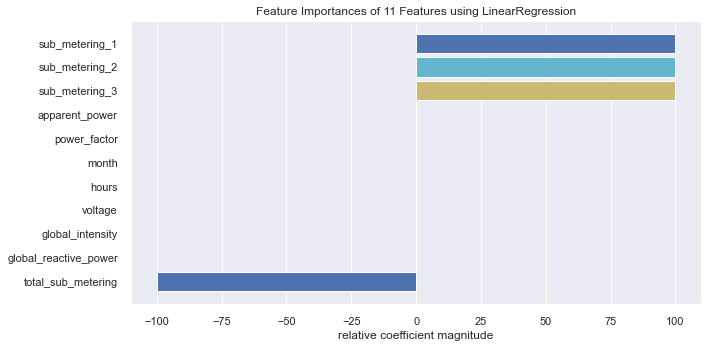

In [99]:
# Feature importance and their effect on the target variable
fig,ax = plt.subplots(figsize=(10,5))
feat_viz = FeatureImportances(model_linear, labels=x_original.columns)
feat_viz.fit(X_train,y_train)
feat_viz.poof();

### Out-of-the-box Model

Our out-of-the-box or random model exercise is pregnant with insights!

First, we can see that dimensionality reduction with Principal Component Analysis affected our data hence the model performance especially when compared with the performances recorded under the model built with our original data and the standardised version of our data.

In terms of algorithms, we can see than Decision Tree, and Random Forest improved on the performance recorded by the linear regression, ridge regression, Bayesianridge both on the original version of our data and the standardised version.

We must, however, state that these results from algorithms with their default hyper-parameters. Thus the result may be improved when their respective hyperparameters are tuned.
Base on the recorded performances of the various models, we shall pick two with the lowest MSE for further fine-tuning.

In [100]:
X_variants = [X_train, X_train_scaled, X_train_pca6, X_train_pca8]
X_names = ['Original data', 'Scaled_version_data', 'PCA_data_six_col', 'PCA_data_8_col']


for train_X, Name_x in zip(X_variants,X_names):
    print('Data:', Name_x)
    linear_reg = LinearRegression()
    linear_reg_scores = cross_val_score(linear_reg,train_X, y_train, cv=4, scoring='neg_mean_squared_error')
    print('Mean Squared Error Score - Linear Regression:', linear_reg_scores.mean())
    
    ridge_regression = Ridge()
    ridge_regression_score = cross_val_score(ridge_regression, train_X, y_train, cv=4, scoring='neg_mean_squared_error')
    print('Mean Squared Error Score:- Ridge Regression', ridge_regression_score.mean())
    
    bayes_ridge = BayesianRidge()
    bayes_ridge_scores = cross_val_score(bayes_ridge,train_X, y_train, cv=4, scoring='neg_mean_squared_error')
    print('Mean Squared Error Scores - Bayesian Ridge:', bayes_ridge_scores.mean())
    
    randomforest = RandomForestRegressor()
    random_forest_score = cross_val_score(randomforest, train_X, y_train, cv=4, scoring='neg_mean_squared_error')
    print('Mean Squared Error Scores - Random Forest', random_forest_score.mean())
    
    decision_tree = DecisionTreeRegressor()
    decision_tree_score = cross_val_score(decision_tree, train_X, y_train, cv=4, scoring='neg_mean_squared_error')
    print('Mean Squared Error Scores - Decision Tree', random_forest_score.mean())
    
    
    print('\n')

Data: Original data
Mean Squared Error Score - Linear Regression: -6.189107051799305e-05
Mean Squared Error Score:- Ridge Regression -6.18993072398376e-05
Mean Squared Error Scores - Bayesian Ridge: -6.189100861953451e-05
Mean Squared Error Scores - Random Forest -3.417775267283759e-06
Mean Squared Error Scores - Decision Tree -3.417775267283759e-06


Data: Scaled_version_data
Mean Squared Error Score - Linear Regression: -6.189122003660837e-05
Mean Squared Error Score:- Ridge Regression -6.190080644043596e-05
Mean Squared Error Scores - Bayesian Ridge: -6.189095307219646e-05
Mean Squared Error Scores - Random Forest -3.2551363044831687e-06
Mean Squared Error Scores - Decision Tree -3.2551363044831687e-06


Data: PCA_data_six_col
Mean Squared Error Score - Linear Regression: -0.08880138429194548
Mean Squared Error Score:- Ridge Regression -0.08880138423292117
Mean Squared Error Scores - Bayesian Ridge: -0.08880138417531985
Mean Squared Error Scores - Random Forest -0.007616649397489005

### Tuning Hyperparameters and analysis of Final Results
From our analysis obviously, our regression model based on the MSE score perform far better than our Random forest model this is rather counter-intuitive because from our initial out-of-the-box model using cross-validation we saw that decision tree and random forest using the scaled data came top in the performance chart. I guess the problem is the model selection process, i.e. the randomized,cross-validation search wherein we indicated the number of iteration as 2 which invariably hasten the search thus resulting in less optimal results. Our random forest definitely would have done better if we had increased the number of iteration, but this would have taken longer time and CPU power.

Generally, our final results either from the regression model or random forest model base on the value of MSE was quite impressive which was further corroborated with the R square results(0.99 on average), but there is definitely more room for improvement.

#### Tuning The Hyper-parameter For Ridge

In [101]:
lambdas = np.linspace(1,100,100)
params={'alpha':lambdas}


In [102]:
ridge_model = Ridge(fit_intercept=True)

In [103]:
grid_search = GridSearchCV(ridge_model, param_grid=params,cv=10,scoring='neg_mean_squared_error')

In [104]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_squared_error')

In [105]:
grid_search.best_estimator_

Ridge()

In [106]:
grid_search.cv_results_

{'mean_fit_time': array([0.14124355, 0.12854209, 0.12403607, 0.1260056 , 0.1318805 ,
        0.13482039, 0.12327375, 0.12117007, 0.12133613, 0.12094042,
        0.13076448, 0.12186649, 0.1218595 , 1.11756384, 1.28708129,
        0.15906756, 0.144765  , 0.14497008, 0.13660939, 0.16807213,
        0.1417841 , 0.13238881, 0.12480431, 0.12713056, 0.13113327,
        0.12105358, 0.12209308, 0.12484074, 0.12351115, 0.12256482,
        0.12367418, 0.13074706, 0.12275276, 0.12177322, 0.12186103,
        0.12324069, 0.1212347 , 0.12259707, 0.12156439, 0.12176831,
        0.12262211, 0.12137158, 0.12122862, 0.12189918, 0.12172387,
        0.1221611 , 0.1306366 , 0.12305021, 0.1321722 , 0.12912128,
        0.12489743, 0.12234528, 0.12245996, 0.91594989, 0.12981129,
        0.16231041, 0.12686067, 0.12204137, 0.13137772, 0.1278904 ,
        0.12280471, 0.13052173, 0.12378662, 0.12289984, 0.12149131,
        0.12137017, 0.1214958 , 0.12209451, 0.12137129, 0.12194095,
        0.12337449, 0.12395592,

In [107]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [108]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 3.0}

Model with rank: 4
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 4.0}

Model with rank: 5
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 5.0}

Model with rank: 6
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 6.0}

Model with rank: 7
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 7.0}

Model with rank: 8
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 8.0}

Model with rank: 9
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 9.0}

Model with rank: 10
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 10.0}

Model with rank: 11
Mean validation score: -0.000 (std: 0.000)
Parameters: {'alpha': 11.0}

Model 

#### Prediction on Test Data(Scaled version of data)

In [109]:
test_pred = grid_search.predict(X_test_scaled)

In [110]:
pd.DataFrame(test_pred).to_csv('pred_result.csv',index=False)

In [111]:
mean_squared_error(y_test_scaled,test_pred)

5.9996754657044916e-05

In [112]:
r2_score(y_test_scaled,test_pred)

0.9999476053900322

#### Get Coefficients

In [113]:
model_redgy = grid_search.best_estimator_

In [114]:
model_redgy.fit(X_train_scaled,y_train)

Ridge()

In [115]:
list(zip(scaled_x_data.columns, model_redgy.coef_))

[('global_reactive_power',
  array([-1.24200405e-02, -3.72508706e-04,  5.19543555e-04,  3.68931977e-04,
          2.35426773e-04,  1.40448924e-04, -1.69924352e-05,  4.20716285e-04,
          3.75802435e-04,  1.06166395e+00,  1.70782939e-02]))]

#### Tuning Hyper-parameter For Random Forest

In [116]:
#parameter set to test
params= {'n_estimators':[1,30],
             'max_features':['auto','log2'],
             'max_depth':[4,8],
             'criterion':['mse','mae']
            
            
            
            }



In [117]:
kf = KFold(n_splits=5, shuffle=True)

In [118]:
#model to use
rand_model = RandomForestRegressor()


In [119]:
CV_model = RandomizedSearchCV(estimator=rand_model,param_distributions=params,cv=kf,random_state=0, scoring='neg_mean_squared_error',verbose=1, n_iter=2)


In [120]:
CV_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.1min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [4, 8],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [1, 30]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [121]:
CV_model.best_params_

{'n_estimators': 30,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'mse'}

In [122]:
CV_model.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=30)

In [123]:
rand_pred_test = CV_model.predict(X_test_scaled)

In [124]:
mean_squared_error(y_test_scaled,rand_pred_test)

0.0077175937496160195

In [125]:
r2_score(y_test_scaled,rand_pred_test)

0.993260296882517

In [126]:
### Using the default parameter of Random forrest on the whole dataset
rand_model.fit(X_train_scaled,y_train_scaled)

RandomForestRegressor()

In [127]:
def_rand_pred_test = rand_model.predict(X_test_scaled)

In [128]:
mean_squared_error(y_test_scaled,def_rand_pred_test)

2.4472520911825752e-06

In [129]:
r2_score(y_test_scaled,def_rand_pred_test)

0.9999978628374228

In [130]:
pd.DataFrame(def_rand_pred_test).to_csv('forest_result.csv', index=False)

## Use Classification Algorithm For the Power Theft Problem (Part 2)

In [131]:
elect_theft_trim.head()

customer_id                date  global_active_power  \
0        27591 2008-01-01 08:53:00                1.384   
1        28486 2008-01-01 08:54:00                1.392   
2        21999 2008-01-01 08:55:00                1.328   
3        22945 2008-01-01 08:56:00                1.298   
4        18370 2008-01-01 08:57:00                1.302   

   global_reactive_power  voltage  global_intensity  sub_metering_1  \
0                  0.108   242.55               5.6               0   
1                  0.110   242.87               5.6               0   
2                  0.000   243.00               5.4               0   
3                  0.000   242.79               5.2               0   
4                  0.000   243.35               5.2               0   

   sub_metering_2  sub_metering_3  hours  month  total_sub_metering  \
0               0               0      8      1                   0   
1               0               0      8      1                   0   
2               0               0      8      1                   0   
3               0               0      8      1                   0   
4               0               0      8      1                   0   

   apparent_power  power_factor  
0        1.388207      0.996969  
1        1.396340      0.996892  
2        1.328000      1.000000  
3        1.298000      1.000000  
4        1.302000      1.000000

In [132]:
elect_theft_trim['Zscore_global_active'] = stats.zscore(elect_theft_trim['global_active_power'])
elect_theft_trim['suspicious_usage'] = np.where(elect_theft_trim['Zscore_global_active'] >= 3, 1,0)
clf_power = elect_theft_trim.drop(['Zscore_global_active'], axis=1)

In [133]:
clf_power['suspicious_usage'].value_counts(normalize=True)

0    0.982579
1    0.017421
Name: suspicious_usage, dtype: float64

In [134]:
clf_power.shape

(500312, 15)

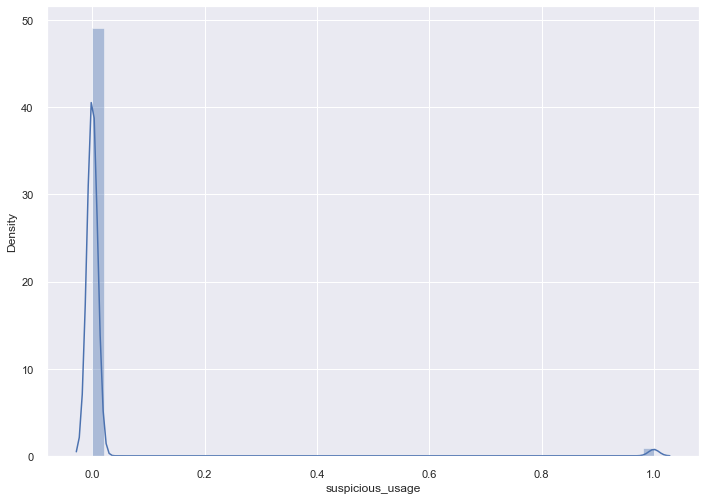

In [135]:
sns.distplot(clf_power['suspicious_usage']);

In [136]:
susp_usage_y = clf_power['suspicious_usage']
#remove useless variables
clf_power_x = clf_power.drop(['customer_id', 'date', 'suspicious_usage'], axis=1)

In [137]:
clf_power_x.shape, susp_usage_y.shape

((500312, 12), (500312,))

In [138]:
clf_power_x.head()

global_active_power  global_reactive_power  voltage  global_intensity  \
0                1.384                  0.108   242.55               5.6   
1                1.392                  0.110   242.87               5.6   
2                1.328                  0.000   243.00               5.4   
3                1.298                  0.000   242.79               5.2   
4                1.302                  0.000   243.35               5.2   

   sub_metering_1  sub_metering_2  sub_metering_3  hours  month  \
0               0               0               0      8      1   
1               0               0               0      8      1   
2               0               0               0      8      1   
3               0               0               0      8      1   
4               0               0               0      8      1   

   total_sub_metering  apparent_power  power_factor  
0                   0        1.388207      0.996969  
1                   0        1.396340      0.996892  
2                   0        1.328000      1.000000  
3                   0        1.298000      1.000000  
4                   0        1.302000      1.000000

### Create four versions of dataset
The result of wrangling our  original dataset into the shape and form suitable to apply classfication algorithm instead of Linear Regression spot a classical behaviour common in all fraud detection problems:class imbalance. This is a situation where under the target variable the positive class is way smaller than the negative class i.e the cases of power theft are smaller than the cases of  normal power usage!

To this end like saw previsously we shall create Three versions of data which we shall use on random models to see their performance via a cross validation process. *original_data*, *scaled_orig_data*, *resample_data*, and *resampled_scaled_data*

#### Data 1- original data Version

In [139]:
X_train_orig, X_test_orig, y_train_orig, y_test_org = train_test_split(clf_power_x, susp_usage_y, test_size=0.2, random_state=42)

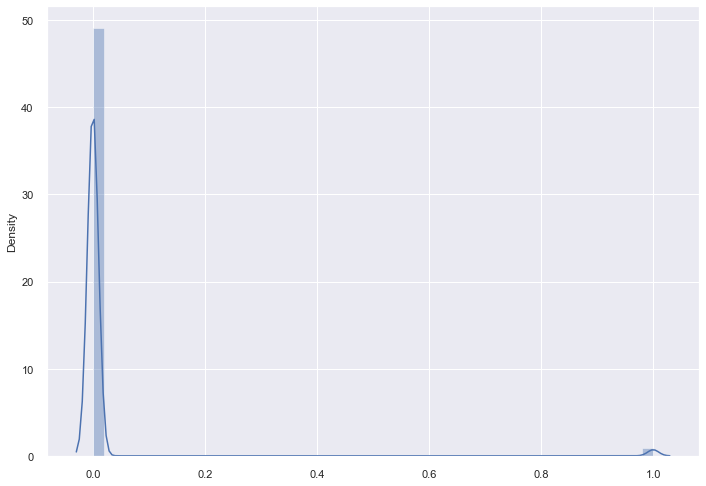

In [140]:
sns.distplot(y_train_orig.values);

In [141]:
##Resambled version of original data
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state=42)
X_resample_orig, y_resampled_orig = method.fit_sample(X_train_orig, y_train_orig)

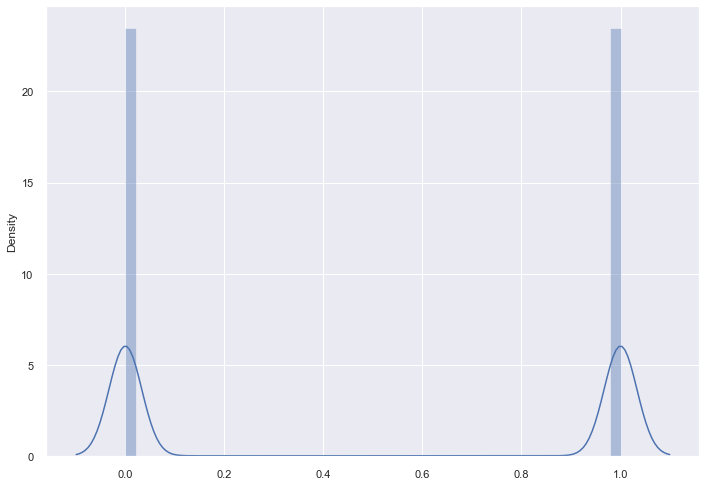

In [142]:
sns.distplot(y_resampled_orig.values);

In [143]:
##make machine ready
X_train_orig = X_train_orig.values
y_train_orig = y_train_orig.values
X_resample_orig = X_resample_orig.values
y_resampled_orig = y_resampled_orig.values

#### Data 2 - standardized & PCA version 

In [144]:
std_orig_x_data = pd.DataFrame(StandardScaler().fit_transform(clf_power_x), columns=clf_power_x.columns)
pca = PCA(n_components=12)
pca_std_data =  pd.DataFrame(pca.fit_transform(std_orig_x_data), columns=clf_power_x.columns)

print(f'The scaled portion  of the data has {std_orig_x_data.shape[0]} rows and {std_orig_x_data.shape[1]} columns')
print('=' * 35)
print(f'The pca portion  of the data has {pca_std_data.shape[0]} rows and {pca_std_data.shape[1]} columns')

The scaled portion  of the data has 500312 rows and 12 columns
The pca portion  of the data has 500312 rows and 12 columns


In [145]:
compressed_col6_pca = pca_std_data.iloc[:,0:6]
compressed_col8_pca = pca_std_data.iloc[:,0:8]

In [146]:
compressed_col6_pca.shape, compressed_col8_pca.shape, std_orig_x_data.shape

((500312, 6), (500312, 8), (500312, 12))

In [147]:
X_train_std,X_test_std, y_train_std,y_test_std = train_test_split(std_orig_x_data, susp_usage_y, test_size=0.20, random_state=42)

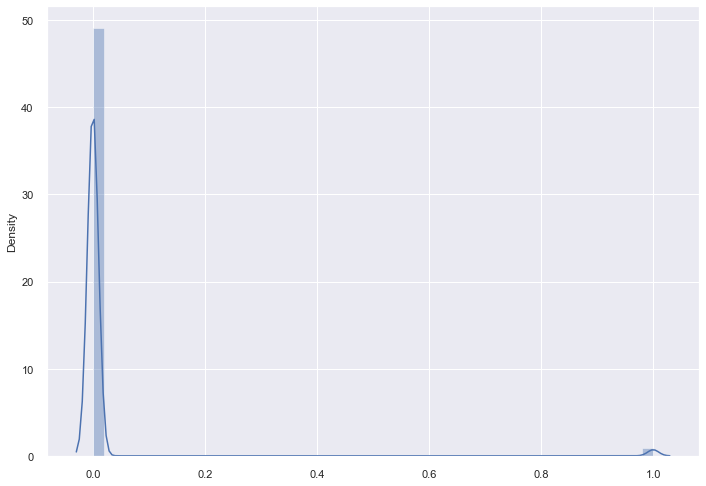

In [148]:
sns.distplot(y_train_std.values);

In [149]:
method = SMOTE(random_state=42)
X_resample_std, y_resampled_std = method.fit_sample(X_train_std, y_train_std)

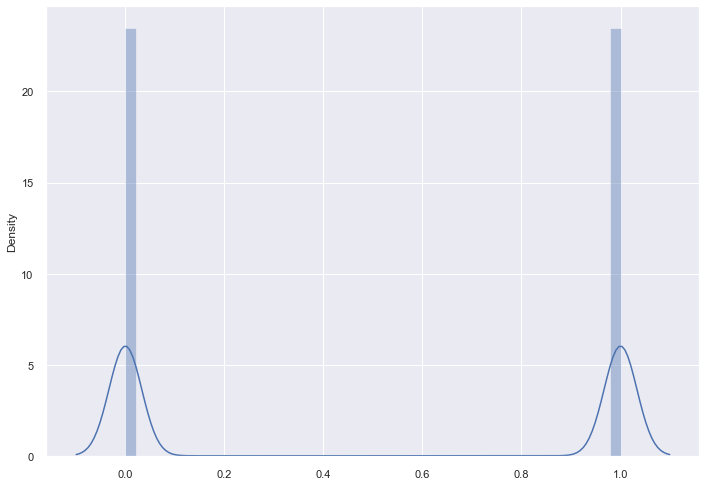

In [150]:
sns.distplot(y_resampled_std.values);

In [151]:
#preapre for machine readability
X_train_std = X_train_std.values
y_train_std = y_train_std.values
X_resample_std = X_resample_std.values


In [152]:
y_resampled_std = y_resampled_std.values

#### Data 3 PCA Six Columns & SMOTE Resampled Version

In [153]:
X_train_col6, X_test_col6, y_train_col6, y_test_col6 = train_test_split(compressed_col6_pca,susp_usage_y,test_size=0.20,random_state=42)

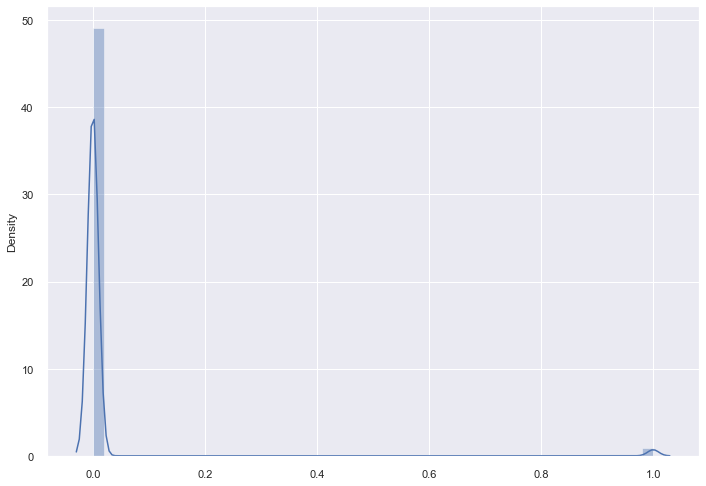

In [154]:
sns.distplot(y_train_col6.values);

In [155]:
method = SMOTE(random_state=42)
X_resample_col6, y_resampled_col6 = method.fit_sample(X_train_col6, y_train_col6)

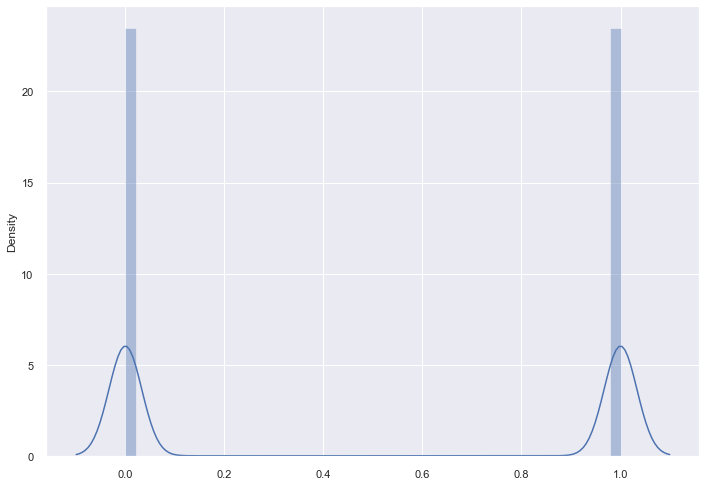

In [156]:
#balanced class
sns.distplot(y_resampled_col6.values);

In [157]:
X_train_col6 = X_train_col6.values
y_train_col6 = y_train_col6.values
X_resample_col6 = X_resample_col6.values
y_resampled_col6 = y_resampled_col6.values

#### Data 4 PCA Eight Columns & SMOTE Resampled Version

In [158]:
X_train_col8, X_test_col8, y_train_col8, y_test_col8 = train_test_split(compressed_col8_pca, susp_usage_y, test_size=0.20, random_state=42)

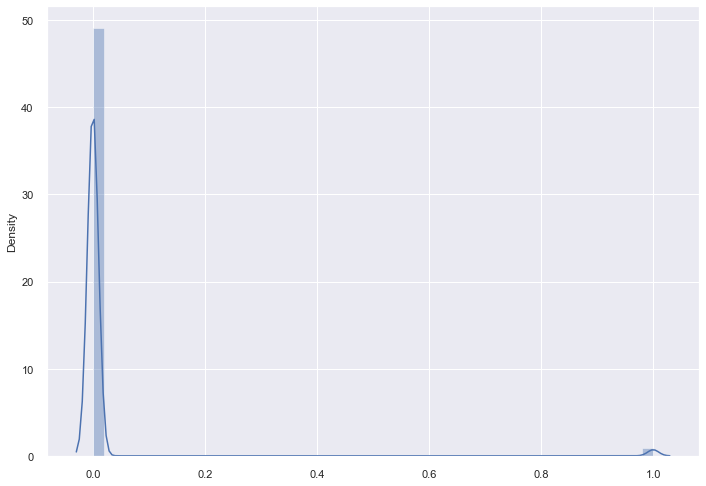

In [159]:
sns.distplot(y_train_col8.values);

In [160]:
method = SMOTE(random_state=42)
X_resample_col8, y_resampled_col8 = method.fit_sample(X_train_col8, y_train_col8)

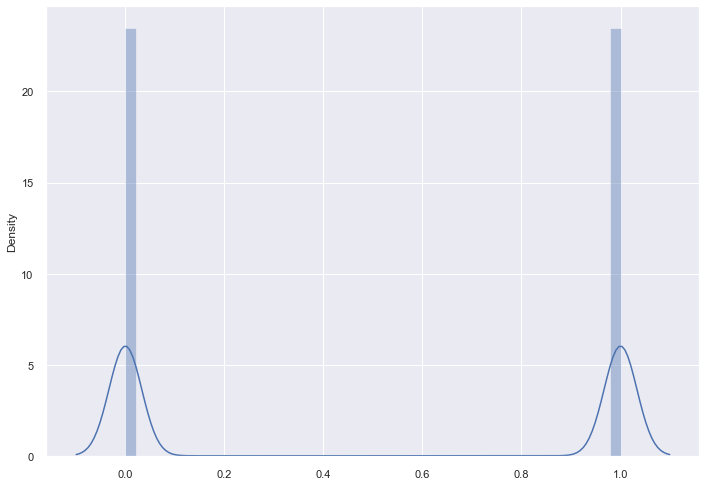

In [161]:
#balanced class
sns.distplot(y_resampled_col8.values);

In [162]:
#prepare for machine readability
X_train_col8 = X_train_col8.values
y_train_col8 = y_train_col8.values
X_resample_col8 = X_resample_col8.values
y_resampled_col8 = y_resampled_col8.values

## Out-of-bag Models
We obviously have to do some unpacking to appreciate the below procedure and the related results.
Firstly, upon shaping our data in a way that we can apply a classification algorithm, we decided to create two broad versions of our dataset
**Unbalanced class Version
- original version
- Standardized version
- PCA with 6 variables version
- PCA with 8 variables version

**Balance Class Version
- Original version
- Standardize version
- PCA with 6 variable version
- PCA with 8 variable version

Secondly, the subversions of each broad version were used to build and train the following model under a cross-validation process:
- Logistics Regression
- SVC-Support Vector Machine
- Kneigbors
- Naive Bayes
- Decision Tree
- Random Forrest

Thirdly, we decided on the F1 score as a performance measure metric. F1 happens to be the harmonic mean of precision and recall metrics. However, concerning our objective which essentially is to reduce the level of false Negative, fraudulent customer predicted as Non-fraudulent customer as much as possible as these lead to actual loss of revenue, on the other hand, we can live with the reality that once in a while the non-fraudulent customer might be predicted as fraudulent or suspicious.In the latter case, further investigation is instigated unlike the former. We shall display the classification report later.

Fourthly we can see that in all the 'subversions', Decision Tree, and Random Forest leads the pack. These models even produce perfect f1 score except when the variable was reduced through PCA. We can also observe that Logistics Regression performed incredibly well across all 'subversions', the least result was approximately 0.82 under the PCA with 6 columns/variables

We can also observe that the least performed model is Naive Bayes. With the least performance score of approximately 0.44 under original and standardize version, both of which are under the imbalanced class version. Thus we might conclude that Naive Bayes algorithm doesn't work well with imbalance class as we equally saw under balanced class the least f1 score of Naive Bayes is approximately 0.92(PCA with 6 variable version-imbalance class) and its highest F1 score was approximately 0.97 (standardized version-balanced class)

In settling for the two best models which we would  further fine-tuned via hyperparameter tuning, we will take into consideration the following factors:
- Explainability/
- Highest f1 score
- compute power and time

Under the above factors, we settle for

- Logistic Regression(standardized and balanced class data)*

- Decision Tree (original and imbalanced class data)




### Out-of-the-bag Models Unbalanced Class

In [163]:
X_train_variant_data = [X_train_orig,X_train_std,  X_train_col6,X_train_col8]
X_names = ['X original data', 'X standardize data','X PCA data 6 col','X PCA data 8 col']

for train_X, X_name in zip(X_train_variant_data, X_names):
    print('Data:', X_name)
    
    log_reg = LogisticRegression()
    reg_scores = cross_val_score(log_reg, train_X, y_train_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - Logistic Regression:', reg_scores.mean())
    
    svc = SVC()
    svc_scores = cross_val_score(svc, train_X, y_train_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - SVC:', svc_scores.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_X, y_train_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - KNN:',knn_score.mean() )
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_score = cross_val_score(decision_tree, train_X, y_train_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_X, y_train_orig, cv=kf, scoring='f1')
    print('Mean F 1 scores - Random Forest:', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_X, y_train_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - Naive Bayes:', naive_score.mean())
    
    
    
    print('\n')

Data: X original data
Mean F 1 score - Logistic Regression: 0.979306406916786
Mean F 1 score - SVC: 0.8734531830069983
Mean F 1 score - KNN: 0.9423851334095688
Mean F 1 score - Decision Tree: 1.0
Mean F 1 scores - Random Forest: 1.0
Mean F 1 score - Naive Bayes: 0.44797186893266183


Data: X standardize data
Mean F 1 score - Logistic Regression: 0.9941548918073504
Mean F 1 score - SVC: 0.9821706491284153
Mean F 1 score - KNN: 0.9506439471697308
Mean F 1 score - Decision Tree: 1.0
Mean F 1 scores - Random Forest: 1.0
Mean F 1 score - Naive Bayes: 0.4481009073891509


Data: X PCA data 6 col
Mean F 1 score - Logistic Regression: 0.8289137523126211
Mean F 1 score - SVC: 0.9252981083839693
Mean F 1 score - KNN: 0.9375046577718716
Mean F 1 score - Decision Tree: 0.9108729738856521
Mean F 1 scores - Random Forest: 0.942083913665088
Mean F 1 score - Naive Bayes: 0.45187070353188635


Data: X PCA data 8 col
Mean F 1 score - Logistic Regression: 0.9921043423073309
Mean F 1 score - SVC: 0.9755219

### Out-of-bag Model Balanced class

In [164]:
X_train_variant_data_bal = [X_resample_orig,X_resample_std,X_resample_col6,X_resample_col8]
X_names_bal = ['X original data with balance class', 'X standardize data with balanced class',\
           'X PCA data 6 col with balanced class','X PCA data 8 col with balanced class']

for train_X, X_name in zip(X_train_variant_data_bal, X_names_bal):
    print('Data:', X_name)
    
    log_reg = LogisticRegression()
    reg_scores = cross_val_score(log_reg, train_X, y_resampled_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - Logistic Regression:', reg_scores.mean())
    
    svc = SVC()
    svc_scores = cross_val_score(svc, train_X, y_resampled_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - SVC:', svc_scores.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_X, y_resampled_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - KNN:',knn_score.mean() )
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_score = cross_val_score(decision_tree, train_X, y_resampled_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_X, y_resampled_orig, cv=kf, scoring='f1')
    print('Mean F 1 scores - Random Forest:', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_X, y_resampled_orig, cv=kf, scoring='f1')
    print('Mean F 1 score - Naive Bayes:', naive_score.mean())
    
    
    
    print('\n')

Data: X original data with balance class
Mean F 1 score - Logistic Regression: 0.9992759795042934
Mean F 1 score - SVC: 0.9957959253515483
Mean F 1 score - KNN: 0.9984679040187003
Mean F 1 score - Decision Tree: 1.0
Mean F 1 scores - Random Forest: 1.0
Mean F 1 score - Naive Bayes: 0.9755419444174989


Data: X standardize data with balanced class
Mean F 1 score - Logistic Regression: 0.9995311279137828
Mean F 1 score - SVC: 0.998994147499894
Mean F 1 score - KNN: 0.9987340977188992
Mean F 1 score - Decision Tree: 1.0
Mean F 1 scores - Random Forest: 1.0
Mean F 1 score - Naive Bayes: 0.9755050724554961


Data: X PCA data 6 col with balanced class
Mean F 1 score - Logistic Regression: 0.9797787455743109
Mean F 1 score - SVC: 0.9957704800142612
Mean F 1 score - KNN: 0.9984779731776603
Mean F 1 score - Decision Tree: 0.9980840885270436
Mean F 1 scores - Random Forest: 0.998812753036939
Mean F 1 score - Naive Bayes: 0.9285669550972621


Data: X PCA data 8 col with balanced class
Mean F 1 sc

### Decision Tree Model- Imbalance & Original  Whole Data

In [165]:
log_reg_std_model = DecisionTreeClassifier()

In [166]:
log_reg_std_model.fit(X_train_orig, y_train_orig)

DecisionTreeClassifier()

In [167]:
X_test_orig  = X_test_orig.values


In [168]:
y_test_org = y_test_org.values

In [169]:
log_reg_std_model.classes_

array([0, 1], dtype=int64)

In [170]:
test_pred_log_std = log_reg_std_model.predict(X_test_orig)

In [171]:
pd.DataFrame(test_pred_log_std).to_csv('decision_result.csv', index=False)

In [172]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score

In [173]:
accuracy_score(y_test_org, test_pred_log_std)

1.0

In [174]:
precision_score(y_test_org, test_pred_log_std)

1.0

In [175]:
f1_score(y_test_org, test_pred_log_std)

1.0

In [176]:
recall_score(y_test_org, test_pred_log_std)

1.0

In [177]:
# scikit confusion matri report
pd.DataFrame(confusion_matrix(y_test_org, test_pred_log_std), columns=['Predict Normal_usage', 'Predict Suspicious_usage'],index=['True Normal_usage','True Suspicious_usage'])

Predict Normal_usage  Predict Suspicious_usage
True Normal_usage                     98286                         0
True Suspicious_usage                     0                      1777

In [178]:
from yellowbrick.classifier import ClassificationReport

In [179]:
from yellowbrick.classifier import ConfusionMatrix

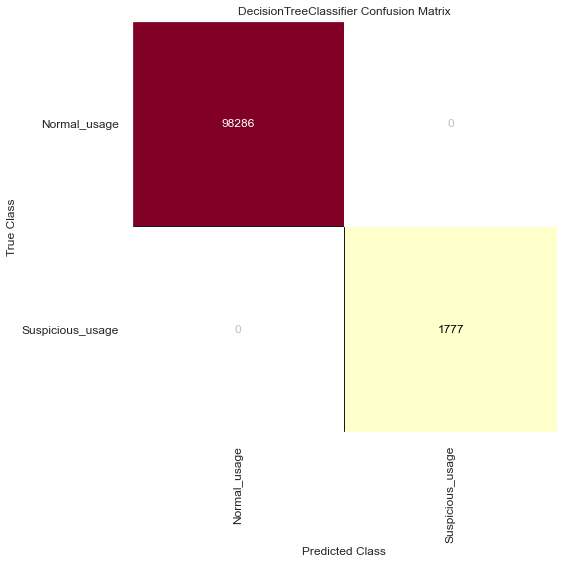

In [180]:
mapping = {0:'Normal_usage', 1:'Suspicious_usage'}
fig, ax = plt.subplots(figsize=(8,8))
clf_viz = ConfusionMatrix(log_reg_std_model, classes=['Normal_usage', 'Suspicious_usage'], label_encoder=mapping)
clf_viz.score(X_test_orig, y_test_org)
clf_viz.poof();

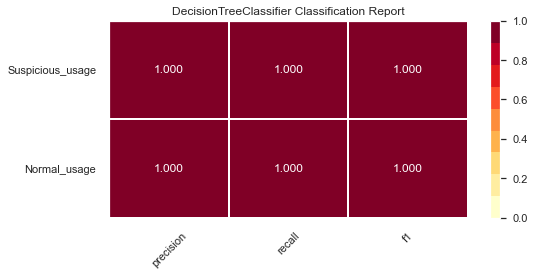

In [181]:
fig, ax = plt.subplots(figsize=(8,4))
clf_vizz = ClassificationReport(log_reg_std_model, classes=['Normal_usage', 'Suspicious_usage'], label_encoder=mapping)
clf_vizz.score(X_test_orig, y_test_org)
clf_vizz.poof();

In [182]:
roc_auc_score(y_test_org, test_pred_log_std)

1.0

In [183]:
average_precision_score(y_test_org, test_pred_log_std)

1.0

In [184]:
from yellowbrick.classifier import PrecisionRecallCurve

0.9993767730506953


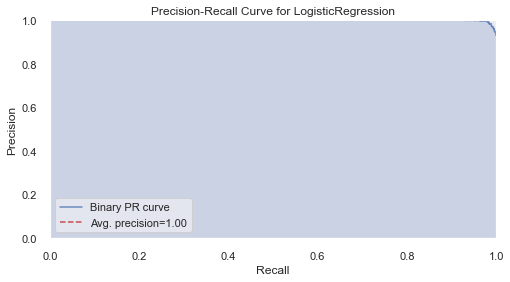

In [185]:
fig, ax = plt.subplots(figsize=(8,4))
av_viz = PrecisionRecallCurve(LogisticRegression())
av_viz.fit(X_train_orig, y_train_orig)
print(av_viz.score(X_test_orig, y_test_org))
av_viz.poof();

In [186]:
!pip install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [232]:
# fig, ax = plt.subplots(figsize=(6,5))
# thres_viz = DiscriminationThreshold(log_reg_std_model)
# thres_viz.fit(X_train_orig, y_train_orig)
# thres_viz.poof();